**Import Libraries**

In [ ]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# sklearn libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
#To install xgboost library use - !pip install xgboost 
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.ensemble import StackingClassifier

In [ ]:
#mount and connect Google Drive
from google.colab import drive
drive.mount('/content/drive')

#Import dataset "used_cars_data.csv"
data_original = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Tourism.csv')

Mounted at /content/drive


Will make a copy of the original dataset to preserve the integrity.

In [ ]:
#Make copy of dataset
data = data_original.copy()

In [ ]:
#Review sample of original dataset
data.sample(10)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3086,203086,0,39.0,Self Enquiry,3,16.0,Small Business,Male,4,5.0,Basic,4.0,Divorced,2.0,0,4,0,1.0,Executive,21577.0
295,200295,0,42.0,Company Invited,3,32.0,Small Business,Female,3,3.0,Super Deluxe,4.0,Divorced,6.0,0,3,1,2.0,AVP,28525.0
282,200282,0,29.0,Company Invited,3,NaN,Salaried,Male,2,3.0,Deluxe,3.0,Single,2.0,0,2,0,0.0,Manager,19554.0
4487,204487,1,27.0,Self Enquiry,3,15.0,Large Business,Male,3,5.0,Deluxe,5.0,Unmarried,8.0,0,3,0,1.0,Manager,24004.0
1109,201109,0,30.0,Self Enquiry,3,35.0,Large Business,Male,2,3.0,Standard,4.0,Married,4.0,0,4,0,1.0,Senior Manager,24250.0
2435,202435,1,NaN,Self Enquiry,2,26.0,Small Business,Female,3,3.0,Basic,4.0,Married,1.0,1,3,0,1.0,Executive,18669.0
1438,201438,1,23.0,Company Invited,3,15.0,Small Business,Male,2,3.0,Basic,5.0,Married,2.0,0,5,1,0.0,Executive,16790.0
1414,201414,0,47.0,Self Enquiry,1,31.0,Small Business,Male,2,3.0,Standard,3.0,Unmarried,3.0,0,3,1,0.0,Senior Manager,23633.0
1655,201655,0,33.0,Self Enquiry,1,20.0,Small Business,Female,3,3.0,Basic,4.0,Married,2.0,0,5,1,1.0,Executive,17756.0
4636,204636,0,39.0,Company Invited,1,17.0,Small Business,Male,4,4.0,Basic,3.0,Married,2.0,0,5,0,1.0,Executive,21362.0


In [ ]:
#Data shape
data.shape

(4888, 20)

In [ ]:
#Number of rows and columns
print(f'Number of rows: {data.shape[0]} and Number of columns: {data.shape[1]}')

Number of rows: 4888 and Number of columns: 20


The CustomerID column does not add any value to the model. We will drop this.

In [ ]:
#Drop ID column
data.drop(['CustomerID'], axis=1, inplace=True)
data.reset_index(inplace=True, drop=True)

In [ ]:
#Number of rows and columns
print(f'Number of rows: {data.shape[0]} and Number of columns: {data.shape[1]}')

Number of rows: 4888 and Number of columns: 19


In [ ]:
#Data type review
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4662 non-null   float64
 2   TypeofContact             4863 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4637 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4862 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4748 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

**Observations**

*   There are (7) float64 datatypes
*   There are (6) int64 datatypes
*   There are (6) object datatypes



In [ ]:
#Review unique values
pd.DataFrame(data.nunique())

,0
ProdTaken,2
Age,44
TypeofContact,2
CityTier,3
DurationOfPitch,34
Occupation,4
Gender,3
NumberOfPersonVisiting,5
NumberOfFollowups,6
ProductPitched,5


Gender is showing (3) values. Let's evaluate this deeper.

In [ ]:
#Evaluation of Gender
data['Gender'].value_counts()

Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

We will replace Fe male with Female for consistency.

In [ ]:
#Replacing Fe Male with Female
data["Gender"] = data["Gender"].replace("Fe Male","Female")

In [ ]:
#Evaluation of Gender for error correction
data['Gender'].value_counts()

Male      2916
Female    1972
Name: Gender, dtype: int64

The female feature has been fixed.

## **Data Preprocessing**

In [ ]:
#Create a list of all categorical datatypes
cat_cols = ["CityTier","ProdTaken","NumberOfPersonVisiting","NumberOfChildrenVisiting","PreferredPropertyStar","Passport","PitchSatisfactionScore","OwnCar"]
data[cat_cols] = data[cat_cols].astype("category")

We will convert the following columns to datatype category:
* CityTier
* ProdTaken
* NumberOfPersonVisiting
* NumberOfChildrenVisiting
* PreferredPropertyStar
* Passport
* PitchSatisfactionScore
* OwnCar

In [ ]:
#Covert categorical columns
cols = data.select_dtypes(["object"])
for cat in cols.columns:
    data[cat] = data[cat].astype("category")

In [ ]:
#Revevaluate datatypes after converting to categories
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   category
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   category
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

There are now (14) category datatypes and (5) float64 datatypes

In [ ]:
#Confirming no data is missing
data.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

The following is missing data:

* Age: 226
* TyprOfContact: 25
* DurationOfPitch: 251
* NumberOfFollowups: 45
* PreferredPropertyStar: 26
* NumberOfTrips: 140
* NumberOfChildrenVisiting: 66
* MonthlyIncome: 233

***Numerical Missing Data Treatment***

In [ ]:
#List the numerical columns
missing_num = data.select_dtypes(include = np.number).columns.tolist()
#Create a lambda function to replace with median
replace_with_median = lambda x: x.fillna(x.median()) 
#Apply the function to replace missing numerical features with the median
data[missing_num] = data[missing_num].apply(replace_with_median,axis=0)

We have replaced the missing numerical data with the median.

In [ ]:
#Confirming no data is missing
data.isnull().sum()

ProdTaken                    0
Age                          0
TypeofContact               25
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar       26
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting    66
Designation                  0
MonthlyIncome                0
dtype: int64

***Treating Missing Categorical Data***

Since Self Enquiry is the most common for TypeofContact, we will replace all the missing data with Self Enquiry.

In [ ]:
#Replacing the missing values for TypeofContact with Self Enquiry
data["TypeofContact"] = data["TypeofContact"].fillna("Self Enquiry")
#Validate the missing data has been fixed for TypeofContact
data['TypeofContact'].isnull().sum()

0

We will replace the missing data for PreferredPropertyStar and NumberOfChildrenVisiting with the mode.

In [ ]:
#Replacing the missing values for PreferredPropertyStar with mode
data['PreferredPropertyStar'] = data['PreferredPropertyStar'].fillna(data['PreferredPropertyStar'].mode()[0])
#Validate the missing data has been fixed for PreferredPropertyStar
data['PreferredPropertyStar'].isnull().sum()

0

In [ ]:
#Replacing the missing values for NumberOfChildrenVisiting with mode
data['NumberOfChildrenVisiting'] = data['NumberOfChildrenVisiting'].fillna(data['NumberOfChildrenVisiting'].mode()[0])
#Validate the missing data has been fixed for NumberOfChildrenVisiting
data['NumberOfChildrenVisiting'].isnull().sum()

0

In [ ]:
#Confirming no data is missing
data.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

All missing data has been addressed.

In [ ]:
#Statistical analysis of numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4888.0,37.547259,9.104795,18.0,31.0,36.0,43.00,61.0
DurationOfPitch,4888.0,15.362930,8.316166,5.0,9.0,13.0,19.00,127.0
NumberOfFollowups,4888.0,3.711129,0.998271,1.0,3.0,4.0,4.00,6.0
NumberOfTrips,4888.0,3.229746,1.822769,1.0,2.0,3.0,4.00,22.0
MonthlyIncome,4888.0,23559.179419,5257.862921,1000.0,20485.0,22347.0,25424.75,98678.0


**Observations**

*   **Age:** Ages range from 18 to 61 years old with a mean age of 37.6
*   **DurationofPitch:** The range for the duration of pitch is 5 to 127 with a mean of 15.4
*   **NumberOfFollowups:** The range for the number of followups is 1 to 6 with a mean of 3.7
*   **NumberOfTrips:** The range for the number of trips is 1 to 22 with a mean of 3.2
*   **MonthlyIncome:** The range for monthly income is 1,000 to 98,678 with a mean of 23,559.18



In [ ]:
#Statistical analysisof categorical columns
data.describe(include="category").T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4888,2,Self Enquiry,3469
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,2916
NumberOfPersonVisiting,4888,5,3,2402
ProductPitched,4888,5,Basic,1842
PreferredPropertyStar,4888.0,3.0,3.0,3019.0
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466


**Observations**

*   The majority of the customers in the dataset did not purchase a travel package
*   Most of the customers in the dataset were as a result of a self enquiry
*   Many of the customers live in Tier 1 cities, are salaried employees with the designation of executive, are married, and are male
*   The most common number of persons visiting is 3
*   The basic package was the most popular package
*   The top occuring preffered property star is 3
*   The most common number of children visiting is 1
*   The most frequent pitch satisfaction score is 3
*   The majority of customers in the dataset own a car but do not have a passport





## **Univariate Analysis**

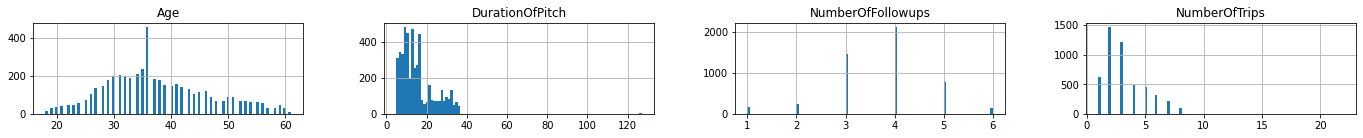

In [ ]:
#View the continuous data 
columns = list(data)[0:-1]
data[columns].hist(stacked=False, bins=100, figsize=(30,30), layout=(14,5));

**Observations**

*   The age category appears to be almost normally distributed with the highest number of customers in the 35-37 range
*   Both the DurationOfPitch and NumberOfTrips are skewed
*   3-4 are the most common for NumberOfFollowups



In [ ]:
#Create a function for univariate analysis (code used from Class Module)
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    ) 
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-")

In [ ]:
#Create function for outlier identification
def feature_outliers(feature: str, data = data):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    return data[((data[feature] < (Q1 - 1.5 * IQR)) | (data[feature] > (Q3 + 1.5 * IQR)))]

These models are not generally influenced by outliers, but we will identify them nonetheless.

***Age***

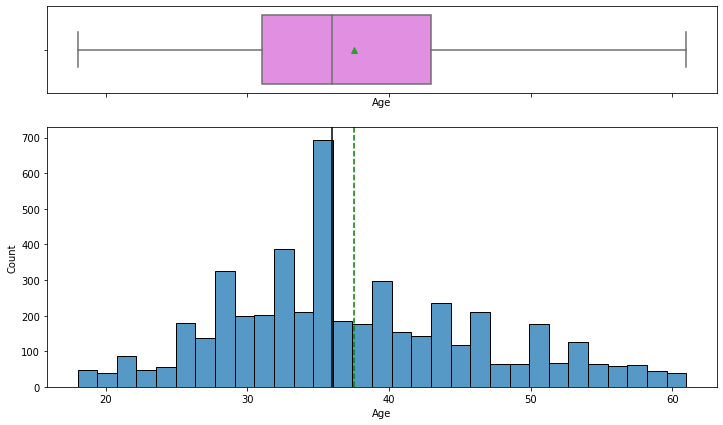

In [ ]:
#Histogram/Boxplot for age analysis
histogram_boxplot(data, "Age")

In [ ]:
#Mean of Age
data.Age.mean()

37.54725859247136

In [ ]:
#Median of Age
data.Age.median()

36.0

The mean age is 37.6 and the median age is 36.

In [ ]:
#Evaluate outliers of age
age_outliers = feature_outliers('Age')
age_outliers.sort_values(by = 'Age', ascending = False)
age_outliers

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome


There do not appear to be any outliers for the age feature.

***Duration of Pitch***

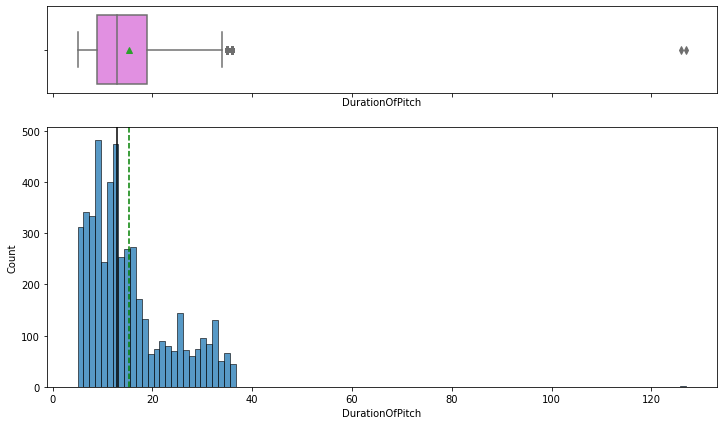

In [ ]:
#Histogram/Boxplot for duration of pitch analysis
histogram_boxplot(data, "DurationOfPitch")

In [ ]:
#Mean of Duration of Pitch
data.DurationOfPitch.mean()

15.362929623567922

In [ ]:
#Median of Duration of Pitch
data.DurationOfPitch.median()

13.0

The mean for DurationOfPitch is 15.4 and the median is 13.

In [ ]:
#Evaluate outliers of duration of pitch
pitch_outliers = feature_outliers('DurationOfPitch')
pitch_outliers.sort_values(by = 'DurationOfPitch', ascending = False)
pitch_outliers

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
61,0,38.0,Company Invited,1,35.0,Salaried,Female,2,3.0,Deluxe,3.0,Single,2.0,0,3,1,0.0,Manager,17406.0
141,0,36.0,Self Enquiry,1,35.0,Small Business,Male,2,3.0,Basic,3.0,Single,6.0,0,2,1,0.0,Executive,18452.0
199,0,38.0,Self Enquiry,1,35.0,Large Business,Male,2,3.0,Deluxe,3.0,Divorced,4.0,0,2,0,1.0,Manager,21261.0
204,1,38.0,Self Enquiry,1,35.0,Small Business,Male,3,3.0,Deluxe,5.0,Divorced,1.0,1,3,0,1.0,Manager,21673.0
259,1,36.0,Company Invited,1,35.0,Small Business,Male,3,4.0,Basic,4.0,Single,1.0,0,3,1,2.0,Executive,18479.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4722,0,30.0,Self Enquiry,1,35.0,Salaried,Female,4,4.0,Basic,3.0,Married,6.0,0,5,1,1.0,Executive,21192.0
4738,0,43.0,Self Enquiry,1,36.0,Small Business,Male,3,6.0,Deluxe,3.0,Unmarried,6.0,0,3,1,2.0,Manager,22950.0
4779,0,31.0,Self Enquiry,3,36.0,Salaried,Male,4,4.0,Deluxe,5.0,Married,2.0,0,1,1,1.0,Manager,22793.0
4789,0,45.0,Self Enquiry,1,36.0,Salaried,Male,3,4.0,Deluxe,3.0,Unmarried,3.0,0,5,1,2.0,Manager,23219.0


There are 112 outliers for duration of pitch.

***Number of Followups***

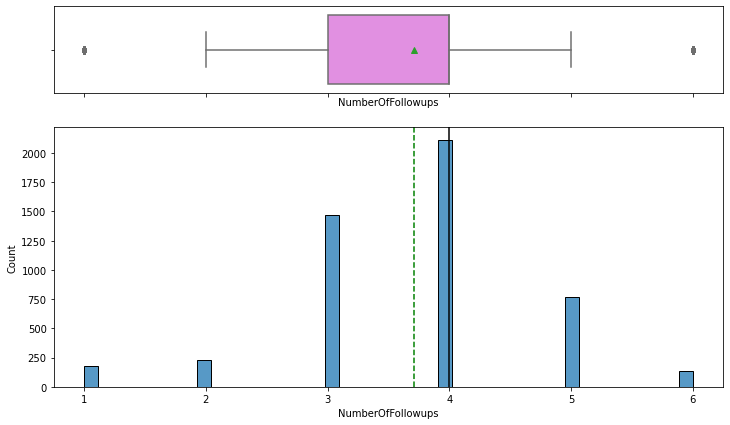

In [ ]:
#Histogram/Boxplot for Number of Followups analysis
histogram_boxplot(data, "NumberOfFollowups")

In [ ]:
#Mean of Number of Followups
data.NumberOfFollowups.mean()

3.711129296235679

In [ ]:
#Median of Number of Followups
data.NumberOfFollowups.median()

4.0

The mean number of followups in 3.7 and the median is 4.

In [ ]:
#Evaluate outliers of number of followups
numfollowups_outliers = feature_outliers('NumberOfFollowups')
numfollowups_outliers.sort_values(by = 'NumberOfFollowups', ascending = False)
numfollowups_outliers

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
566,1,47.0,Company Invited,3,33.0,Salaried,Female,3,1.0,Deluxe,3.0,Unmarried,5.0,1,4,1,2.0,Manager,21397.0
574,0,34.0,Self Enquiry,1,6.0,Salaried,Female,3,1.0,Basic,3.0,Single,3.0,0,2,0,0.0,Executive,18280.0
578,0,38.0,Company Invited,1,8.0,Salaried,Female,3,1.0,Deluxe,5.0,Single,7.0,1,2,1,2.0,Manager,20980.0
582,0,40.0,Company Invited,1,13.0,Small Business,Female,2,1.0,Deluxe,4.0,Divorced,2.0,0,3,0,1.0,Manager,22347.0
585,1,23.0,Self Enquiry,1,12.0,Salaried,Male,3,1.0,Basic,5.0,Divorced,2.0,1,3,1,2.0,Executive,16601.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4857,1,47.0,Self Enquiry,3,22.0,Small Business,Male,3,6.0,Deluxe,3.0,Married,8.0,1,1,0,2.0,Manager,22101.0
4864,1,32.0,Self Enquiry,2,29.0,Salaried,Male,3,6.0,Basic,3.0,Married,3.0,0,1,0,2.0,Executive,28530.0
4865,1,42.0,Company Invited,3,16.0,Salaried,Male,3,6.0,Super Deluxe,3.0,Married,2.0,0,5,1,2.0,AVP,24829.0
4867,1,45.0,Self Enquiry,3,8.0,Salaried,Male,3,6.0,Deluxe,4.0,Single,8.0,0,3,0,2.0,Manager,21040.0


There are 312 outliers for the number of followup features.

**Monthly Income**

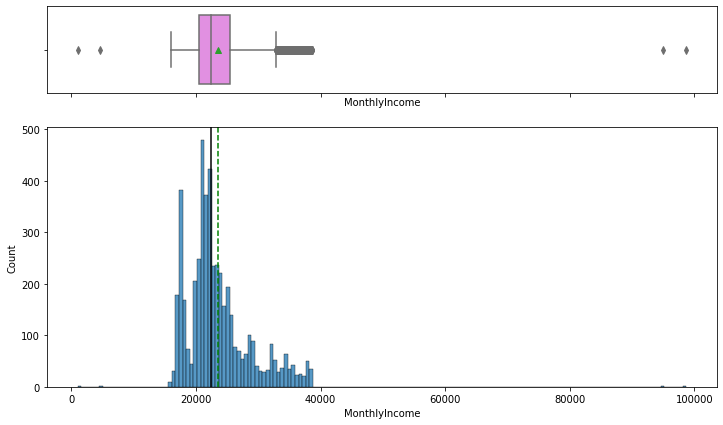

In [ ]:
#Histogram/Boxplot for MonthlyIncome analysis
histogram_boxplot(data, "MonthlyIncome")

In [ ]:
#Mean of Monthly Income
data.MonthlyIncome.mean()

23559.17941898527

In [ ]:
#Median of Monthly Income
data.MonthlyIncome.median()

22347.0

The mean monthly income is 23,559.18 and the median is 22,347.

In [ ]:
#Evaluate outliers of monthly income
income_outliers = feature_outliers('MonthlyIncome')
income_outliers.sort_values(by = 'MonthlyIncome', ascending = False)
income_outliers

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
25,0,53.0,Self Enquiry,1,11.0,Salaried,Female,2,3.0,King,3.0,Married,5.0,0,5,0,1.0,VP,34094.0
29,0,46.0,Self Enquiry,3,8.0,Small Business,Female,2,3.0,King,5.0,Single,4.0,0,2,0,1.0,VP,33947.0
38,0,36.0,Self Enquiry,1,11.0,Salaried,Female,2,4.0,Basic,3.0,Divorced,1.0,1,2,1,0.0,Executive,95000.0
45,1,41.0,Self Enquiry,1,18.0,Large Business,Female,2,3.0,King,3.0,Divorced,2.0,0,4,1,0.0,VP,34545.0
62,0,50.0,Self Enquiry,1,13.0,Small Business,Female,2,4.0,King,3.0,Married,6.0,1,4,1,1.0,VP,33740.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4851,1,40.0,Self Enquiry,1,9.0,Salaried,Female,4,4.0,Basic,5.0,Married,3.0,1,1,1,1.0,Executive,35801.0
4859,1,51.0,Company Invited,3,19.0,Salaried,Male,3,4.0,Deluxe,3.0,Single,5.0,1,3,1,2.0,Manager,35558.0
4868,1,43.0,Company Invited,2,15.0,Salaried,Female,4,5.0,Basic,3.0,Married,3.0,0,5,1,2.0,Executive,36539.0
4869,1,56.0,Self Enquiry,3,16.0,Small Business,Female,3,6.0,Basic,4.0,Single,3.0,0,1,1,2.0,Executive,37865.0


There are 375 outliers for the monthly income feature.

***Number of Trips***

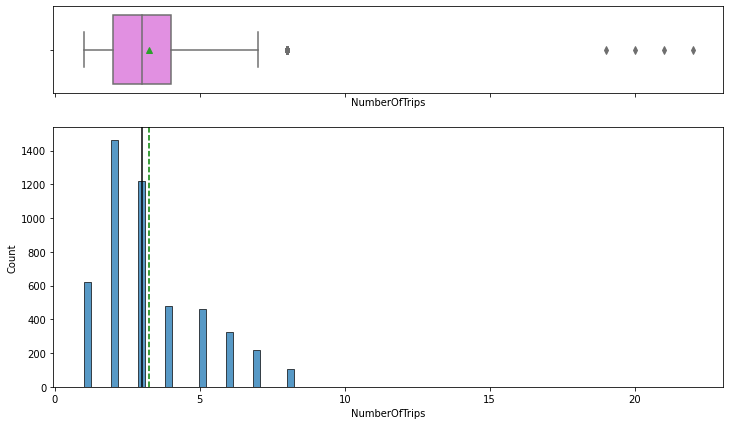

In [ ]:
#Histogram/Boxplot for Number of Trips analysis
histogram_boxplot(data, "NumberOfTrips")

In [ ]:
#Mean of Number of Trips
data.NumberOfTrips.mean()

3.229746317512275

In [ ]:
#Median of Number of Trips
data.NumberOfTrips.median()

3.0

The mean number of trips is 3.2 and the median is 3.0

In [ ]:
#Evaluate outliers of number of trips
numtrips_outliers = feature_outliers('NumberOfTrips')
numtrips_outliers.sort_values(by = 'NumberOfTrips', ascending = False)
numtrips_outliers

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0
816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,4.0,Unmarried,21.0,0,2,1,0.0,Manager,21782.0
2446,1,38.0,Self Enquiry,1,9.0,Free Lancer,Male,4,5.0,Basic,3.0,Single,8.0,1,3,0,1.0,Executive,20768.0
2453,0,37.0,Self Enquiry,1,34.0,Small Business,Male,4,4.0,Deluxe,3.0,Divorced,8.0,0,3,1,1.0,Manager,23915.0
2558,0,35.0,Self Enquiry,1,13.0,Salaried,Female,3,5.0,Deluxe,4.0,Married,8.0,0,3,0,2.0,Manager,23183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4778,1,42.0,Company Invited,1,12.0,Salaried,Male,4,5.0,Basic,5.0,Married,8.0,0,3,0,2.0,Executive,20785.0
4840,1,44.0,Company Invited,1,9.0,Salaried,Male,4,4.0,Basic,3.0,Married,8.0,1,3,0,1.0,Executive,28909.0
4847,1,29.0,Self Enquiry,1,8.0,Large Business,Male,4,5.0,Basic,5.0,Single,8.0,0,3,1,2.0,Executive,20758.0
4857,1,47.0,Self Enquiry,3,22.0,Small Business,Male,3,6.0,Deluxe,3.0,Married,8.0,1,1,0,2.0,Manager,22101.0


There are 109 outliers for the number of trips feature.

***City Tier***

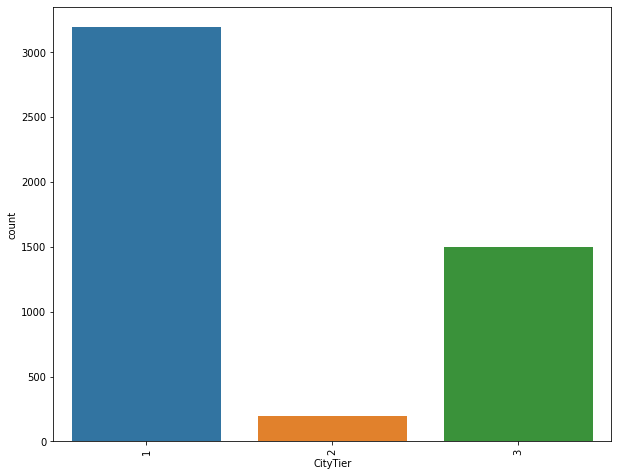

In [ ]:
#Countplot of the CityTier
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'CityTier', data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90);

The most common city tier is 1 and the least common is 2.

***Type of Contact***

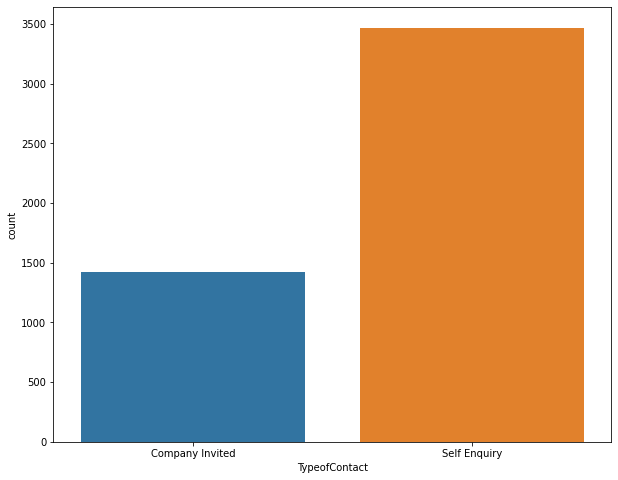

In [ ]:
#Countplot of the TypeofContact column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'TypeofContact', data = data)
ax.set_xticklabels(ax.get_xticklabels());

The majory of customers came in as a result of self enquiry.

***Occupation***

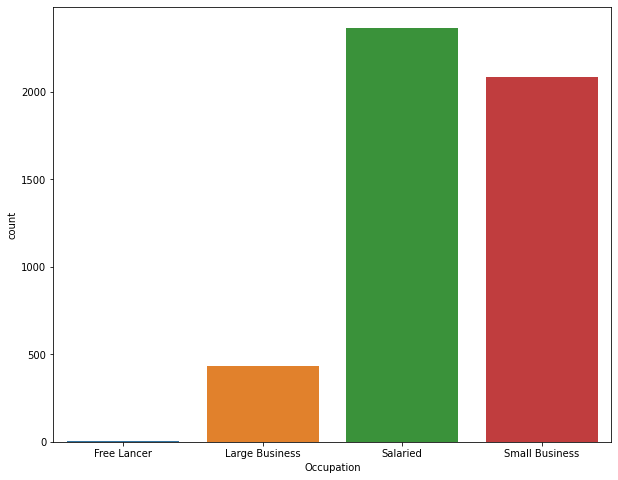

In [ ]:
#Countplot of the occupation column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'Occupation', data = data)
ax.set_xticklabels(ax.get_xticklabels());

There are very few freelancers in the dataset and the majority of customers identify as salaried or small business.

***Designation***

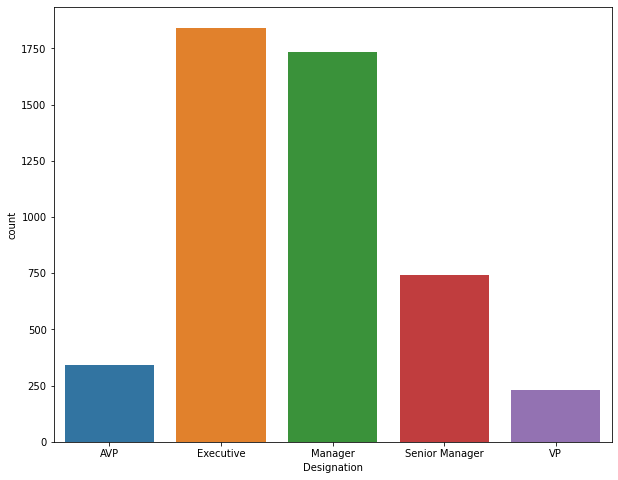

In [ ]:
#Countplot of the designation column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'Designation', data = data)
ax.set_xticklabels(ax.get_xticklabels());

Most of the customers identify as executive or manager designations.

***Gender***

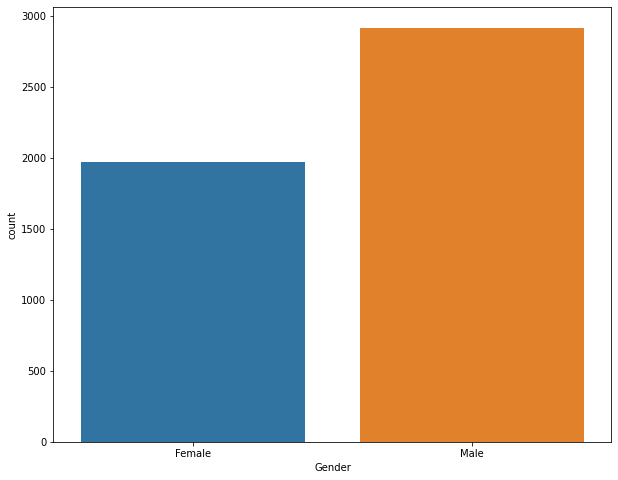

In [ ]:
#Countplot of the Gender column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'Gender', data = data)
ax.set_xticklabels(ax.get_xticklabels());

There are more males than females in the dataset.

***Marital Status***

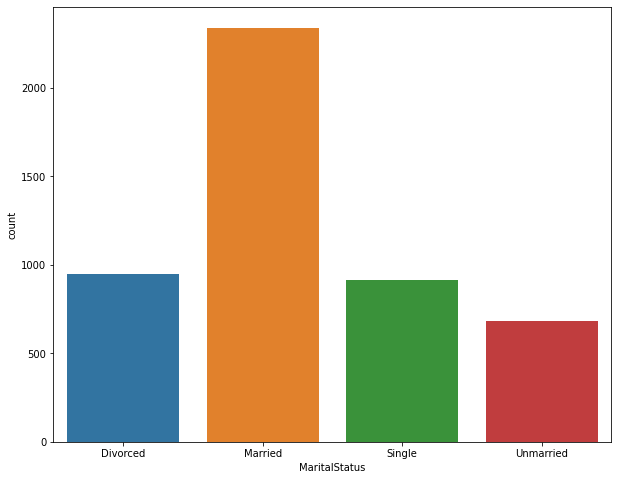

In [ ]:
#Countplot of the MaritalStatus column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'MaritalStatus', data = data)
ax.set_xticklabels(ax.get_xticklabels());

The majprity of the customers are married. The divorced, single, and unmarried identified customers are relatively even.

***Number Of Person Visiting***

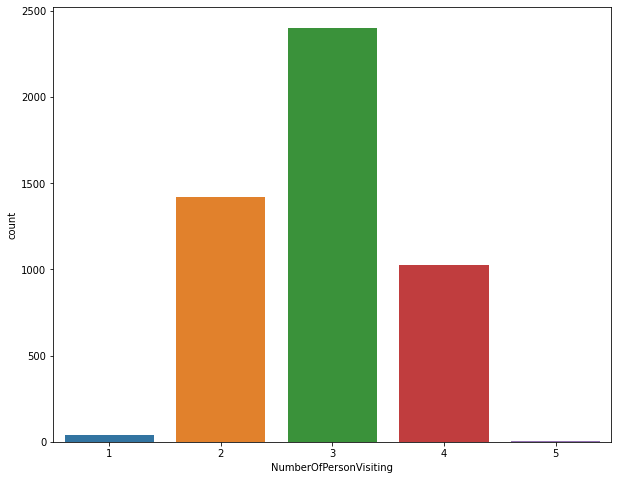

In [ ]:
#Countplot of the NumberOfPersonVisiting column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'NumberOfPersonVisiting', data = data)
ax.set_xticklabels(ax.get_xticklabels());

The most frequent number of visitors is 3 and the least is 5. This is most likely represents married people with 1 child - although that is speculation.

***Number Of Children Visiting***

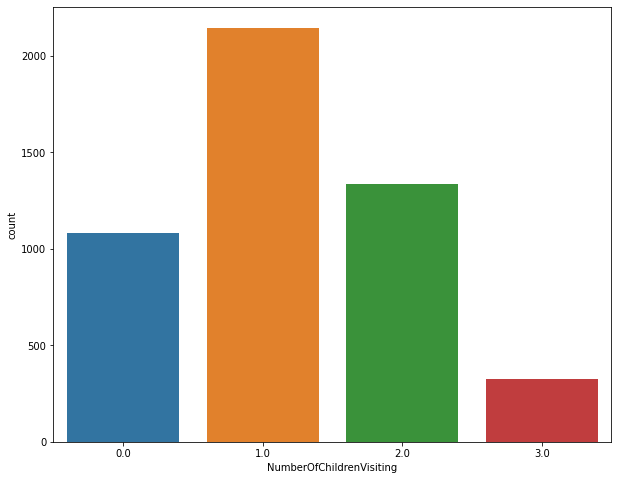

In [ ]:
#Countplot of the NumberOfChildrenVisiting column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'NumberOfChildrenVisiting', data = data)
ax.set_xticklabels(ax.get_xticklabels());

One child visiting is the most common in this dataset.

***Number of Followups***

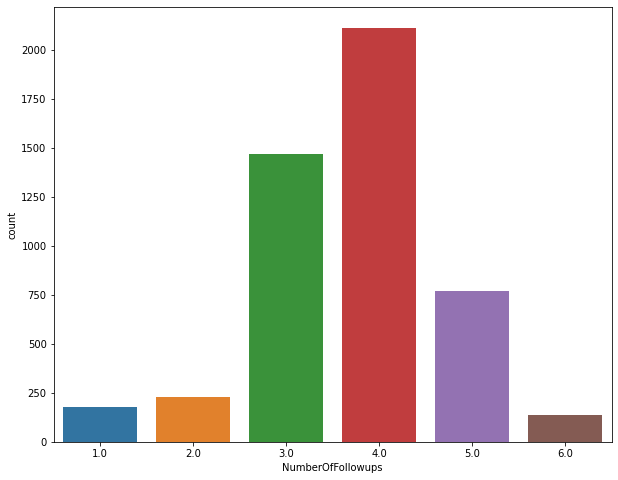

In [ ]:
#Countplot of the NumberOfFollowups column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'NumberOfFollowups', data = data)
ax.set_xticklabels(ax.get_xticklabels());

3-5 followups appear to be the sweet spot here.

***Product Pitched***

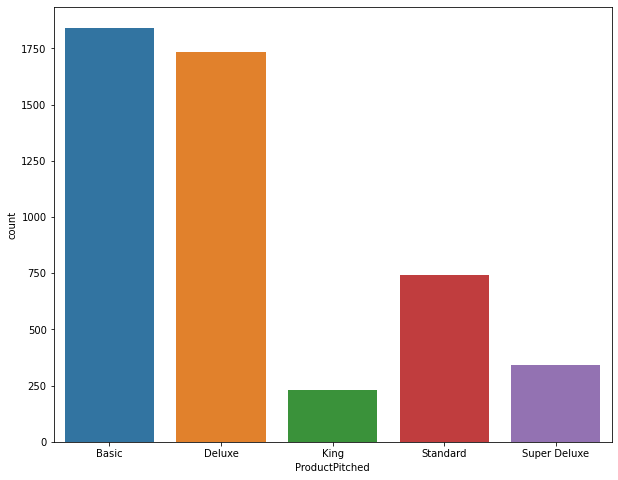

In [ ]:
#Countplot of the ProductPitched column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'ProductPitched', data = data)
ax.set_xticklabels(ax.get_xticklabels());

The basic and deluxe packages are the largest number of products pitched.

***Preferred Property Star***

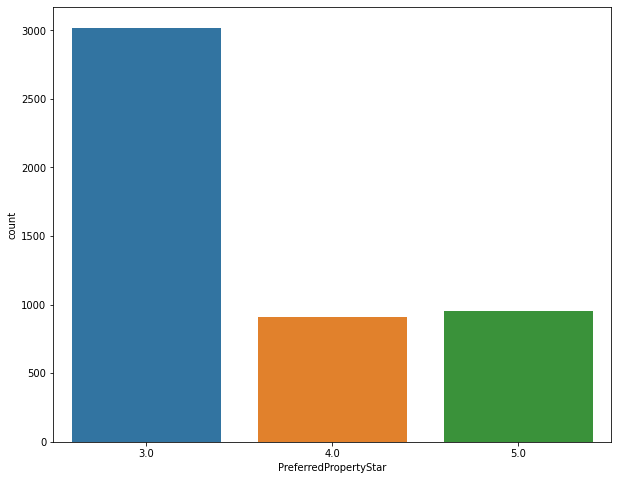

In [ ]:
#Countplot of the PreferredPropertyStar column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'PreferredPropertyStar', data = data)
ax.set_xticklabels(ax.get_xticklabels());

It appears most customers prefer the 3 preferred property star options.

***Number of Trips***

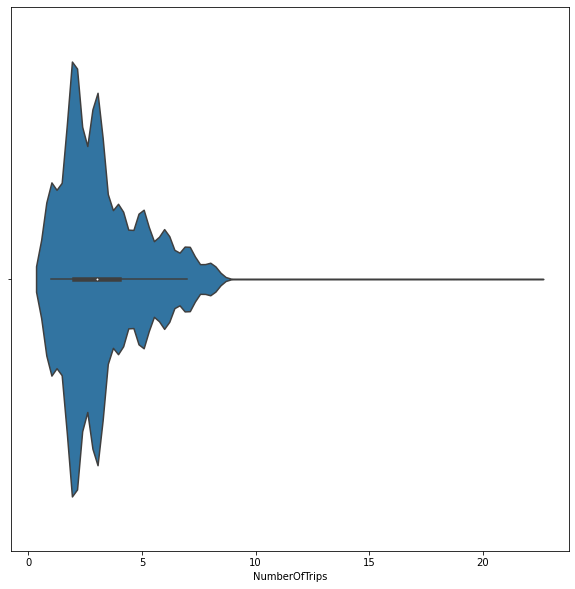

In [ ]:
#Stripplot of number of trips
plt.figure(figsize = (10,10))
sns.violinplot(x = 'NumberOfTrips', data = data);

In [ ]:
#Mean of NumberOfTrips
data.NumberOfTrips.mean()

3.229746317512275

In [ ]:
#Median of NumberOfTrips
data.NumberOfTrips.median()

3.0

The mean number of trips is 3.2 and the median is 3.

In [ ]:
#Evaluate outliers of number of trips
numtrips_outliers = feature_outliers('NumberOfTrips')
numtrips_outliers.sort_values(by = 'NumberOfTrips', ascending = False)
numtrips_outliers

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
385,1,30.0,Company Invited,1,10.0,Large Business,Male,2,3.0,Basic,3.0,Single,19.0,1,4,1,1.0,Executive,17285.0
816,0,39.0,Company Invited,1,15.0,Salaried,Male,3,3.0,Deluxe,4.0,Unmarried,21.0,0,2,1,0.0,Manager,21782.0
2446,1,38.0,Self Enquiry,1,9.0,Free Lancer,Male,4,5.0,Basic,3.0,Single,8.0,1,3,0,1.0,Executive,20768.0
2453,0,37.0,Self Enquiry,1,34.0,Small Business,Male,4,4.0,Deluxe,3.0,Divorced,8.0,0,3,1,1.0,Manager,23915.0
2558,0,35.0,Self Enquiry,1,13.0,Salaried,Female,3,5.0,Deluxe,4.0,Married,8.0,0,3,0,2.0,Manager,23183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4778,1,42.0,Company Invited,1,12.0,Salaried,Male,4,5.0,Basic,5.0,Married,8.0,0,3,0,2.0,Executive,20785.0
4840,1,44.0,Company Invited,1,9.0,Salaried,Male,4,4.0,Basic,3.0,Married,8.0,1,3,0,1.0,Executive,28909.0
4847,1,29.0,Self Enquiry,1,8.0,Large Business,Male,4,5.0,Basic,5.0,Single,8.0,0,3,1,2.0,Executive,20758.0
4857,1,47.0,Self Enquiry,3,22.0,Small Business,Male,3,6.0,Deluxe,3.0,Married,8.0,1,1,0,2.0,Manager,22101.0


There are 109 outliers in the number of trips feature.

***Passport***

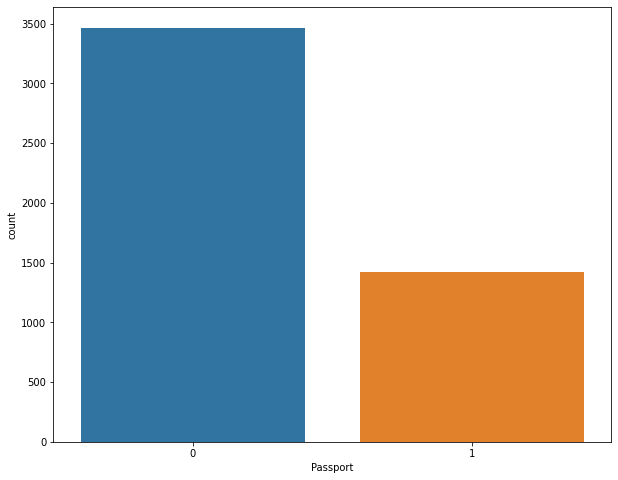

In [ ]:
#Countplot of the Passport column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'Passport', data = data)
ax.set_xticklabels(ax.get_xticklabels());

The majority of customers in the dataset do not have a passport so there out of country packages may be less appealing for the customers in this dataset.

***Pitch Satisfaction Score***

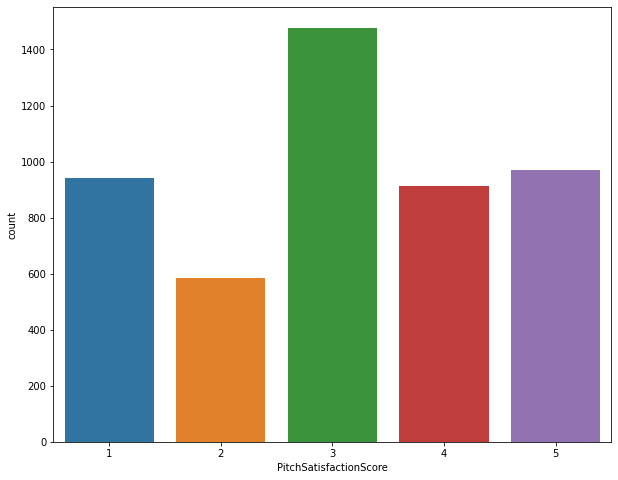

In [ ]:
#Countplot of the PitchSatisfactionScore column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'PitchSatisfactionScore', data = data)
ax.set_xticklabels(ax.get_xticklabels());

Most of the customer appear to be satisfied with the pitch with the majority scoring 3-5

***Own Car***

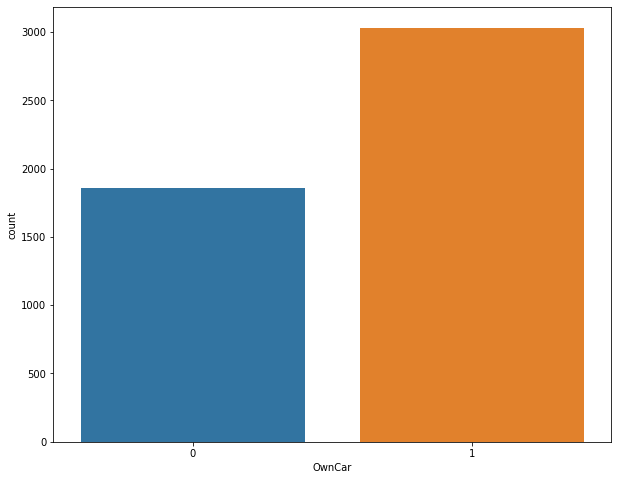

In [ ]:
#Countplot of the own car column
plt.figure(figsize = (10,8))
ax = sns.countplot(x = 'OwnCar', data = data)
ax.set_xticklabels(ax.get_xticklabels());

MThere are over 1,000 more customers with a car than those without.

**Bivariate Analysis**

In [ ]:
#Function for Multivariate analysis (code taken from class notes)
def stacked_barplot(data, predictor, target):

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

***Age v. ProdTaken***

ProdTaken     0    1   All
Age                       
All        3968  920  4888
36.0        386   71   457
29.0        121   57   178
30.0        151   48   199
34.0        167   44   211
31.0        162   41   203
33.0        149   40   189
32.0        157   40   197
26.0         69   37   106
35.0        203   34   237
27.0        108   30   138
28.0        121   26   147
20.0         13   25    38
41.0        131   24   155
37.0        161   24   185
40.0        123   23   146
21.0         18   23    41
19.0         11   21    32
25.0         54   20    74
42.0        122   20   142
24.0         38   18    56
45.0         98   18   116
44.0         88   17   105
51.0         73   17    90
38.0        161   15   176
22.0         31   15    46
39.0        136   14   150
52.0         54   14    68
23.0         33   13    46
47.0         76   12    88
56.0         46   12    58
50.0         74   12    86
59.0         32   12    44
58.0         20   11    31
48.0         54   11    65
4

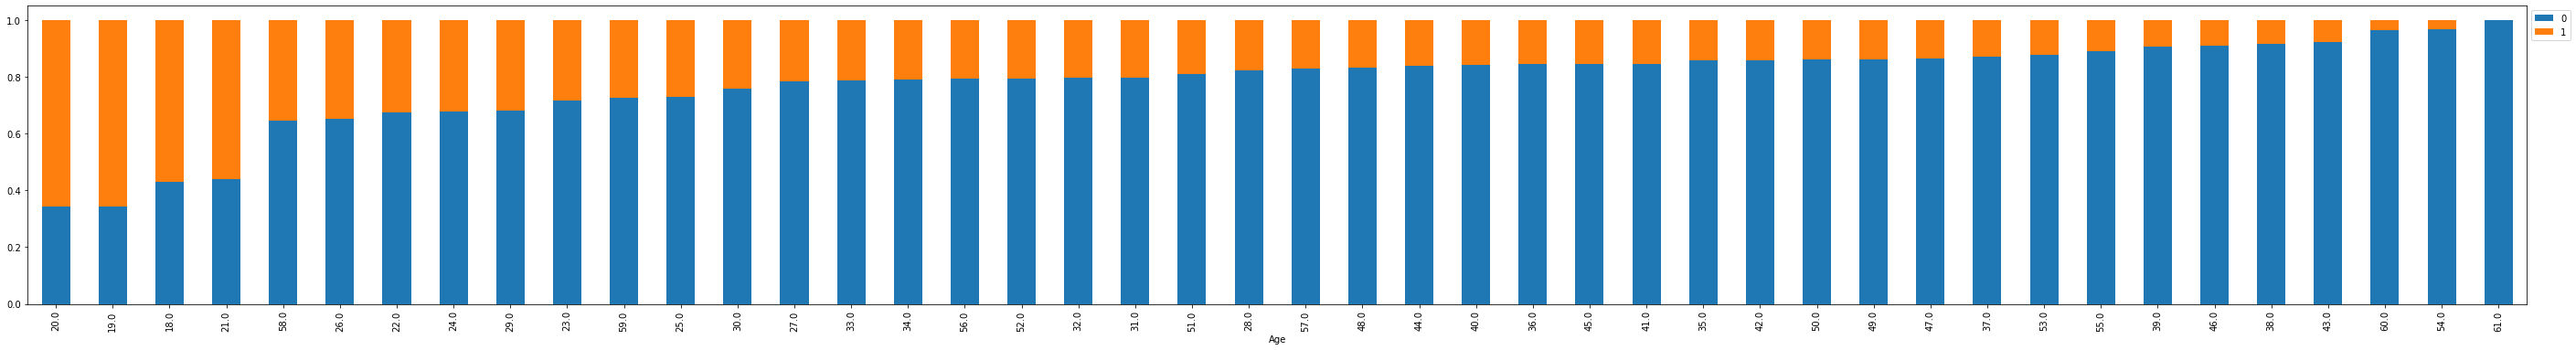

In [ ]:
#Barplot of prodtaken by age
stacked_barplot(data, "Age", "ProdTaken")

More customers aged 18-21 purchased a travel package. As customers get older, the number of purchases go down.

***Type of Contact v. ProdTaken***

ProdTaken           0    1   All
TypeofContact                   
All              3968  920  4888
Self Enquiry     2859  610  3469
Company Invited  1109  310  1419
------------------------------------------------------------------------------------------------------------------------


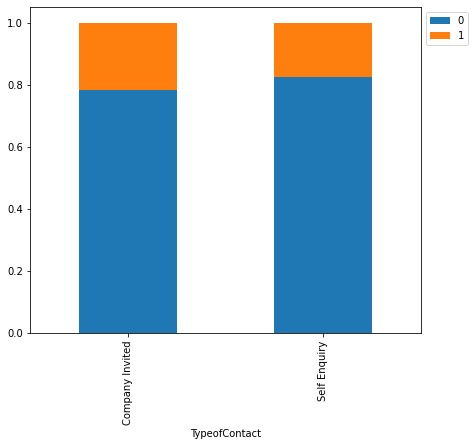

In [ ]:
#Barplot of prodtaken by typeofcontact
stacked_barplot(data, "TypeofContact", "ProdTaken")

While most of the customers came in as a result of self enquiry, there is a higher purchase rate when company invited.

***Duration Of Pitch v. ProdTaken***

ProdTaken           0    1   All
DurationOfPitch                 
All              3968  920  4888
9.0               404   79   483
13.0              397   77   474
8.0               273   60   333
16.0              218   56   274
15.0              217   52   269
7.0               294   48   342
10.0              199   45   244
14.0              212   41   253
6.0               268   39   307
11.0              168   37   205
12.0              162   33   195
31.0               52   31    83
30.0               65   30    95
17.0              148   24   172
22.0               66   23    89
19.0               36   21    57
23.0               58   21    79
29.0               53   21    74
18.0               56   19    75
20.0               46   19    65
28.0               44   17    61
21.0               57   16    73
24.0               54   16    70
32.0               59   15    74
27.0               58   14    72
25.0               59   14    73
26.0               60   12    72
33.0      

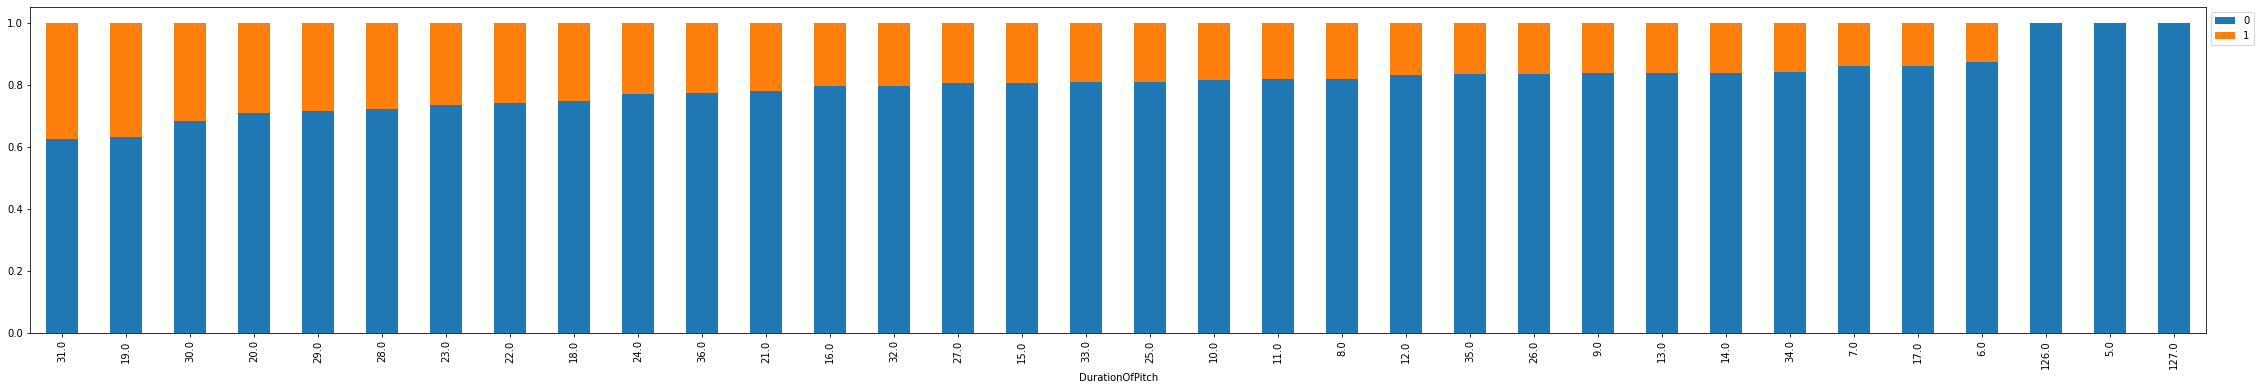

In [ ]:
#Barplot of prodtaken by durationofpitch
stacked_barplot(data, "DurationOfPitch", "ProdTaken")

There is really not a huge trend here based on the duration of the pitch.

***City Tier v. ProdTaken***

ProdTaken     0    1   All
CityTier                  
All        3968  920  4888
1          2670  520  3190
3          1146  354  1500
2           152   46   198
------------------------------------------------------------------------------------------------------------------------


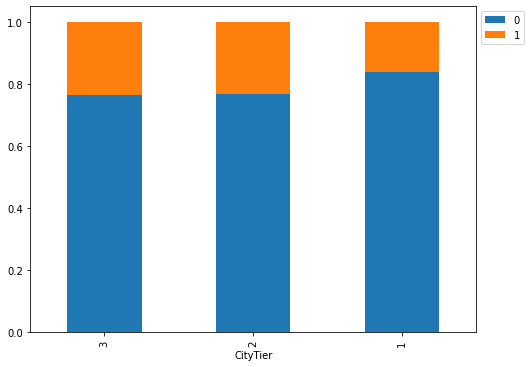

In [ ]:
#Barplot of prodtaken by citytier
stacked_barplot(data, "CityTier", "ProdTaken")

City tiers 3 and 2 are almost identical for those who purchased.

***Occupation v. ProdTaken***

ProdTaken          0    1   All
Occupation                     
All             3968  920  4888
Salaried        1954  414  2368
Small Business  1700  384  2084
Large Business   314  120   434
Free Lancer        0    2     2
------------------------------------------------------------------------------------------------------------------------


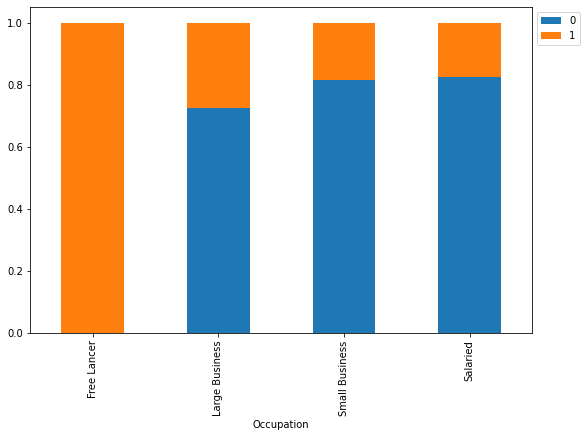

In [ ]:
#Barplot of prodtaken by occupation
stacked_barplot(data, "Occupation", "ProdTaken")

Freelancers make up the majority of occupations who purchased where salaried and small business owners make up the least.

***Gender v. ProdTaken***

ProdTaken     0    1   All
Gender                    
All        3968  920  4888
Male       2338  578  2916
Female     1630  342  1972
------------------------------------------------------------------------------------------------------------------------


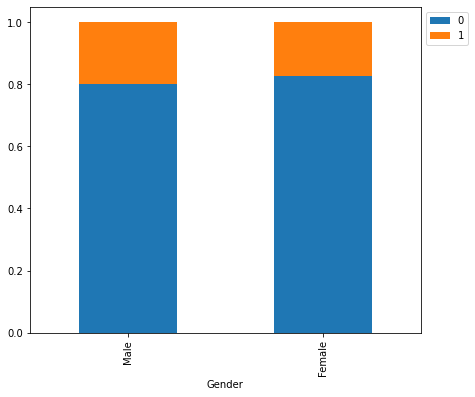

In [ ]:
#Barplot of prodtaken by gender
stacked_barplot(data, "Gender", "ProdTaken")

There are approximately 1,000 more males than females in the dataset. More males purchased than females, but the dataset is more skewed to males.

***Number Of Person Visiting v. ProdTaken***

ProdTaken                  0    1   All
NumberOfPersonVisiting                 
All                     3968  920  4888
3                       1942  460  2402
2                       1151  267  1418
4                        833  193  1026
1                         39    0    39
5                          3    0     3
------------------------------------------------------------------------------------------------------------------------


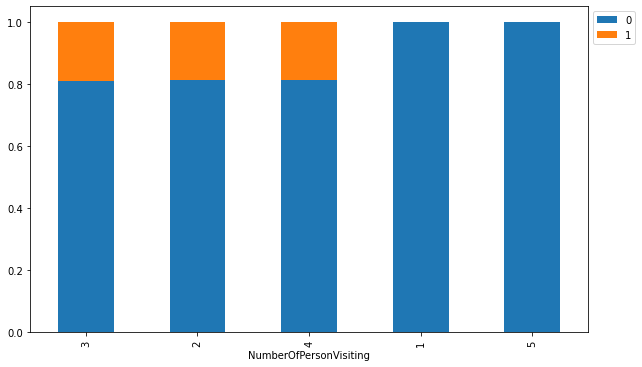

In [ ]:
#Barplot of prodtaken by NumberOfPersonVisiting
stacked_barplot(data, "NumberOfPersonVisiting", "ProdTaken")

The number of persons visiting is roughly equal for 2-4 people where 1 and 5 for number of people visiting did not purchase at all.

***Number of Followups v. ProdTaken***

ProdTaken             0    1   All
NumberOfFollowups                 
All                3968  920  4888
4.0                1726  387  2113
3.0                1222  244  1466
5.0                 577  191   768
6.0                  82   54   136
2.0                 205   24   229
1.0                 156   20   176
------------------------------------------------------------------------------------------------------------------------


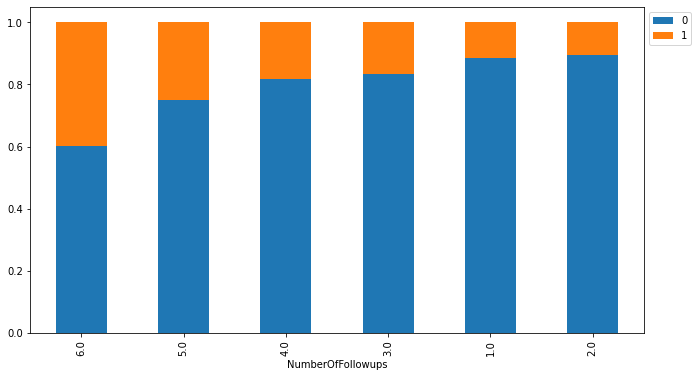

In [ ]:
#Barplot of prodtaken by NumberOfFollowups
stacked_barplot(data, "NumberOfFollowups", "ProdTaken")

This shows that the more followups had a better success at purchasing a travel package.

***Product Pitched v. ProdTaken***

ProdTaken          0    1   All
ProductPitched                 
All             3968  920  4888
Basic           1290  552  1842
Deluxe          1528  204  1732
Standard         618  124   742
King             210   20   230
Super Deluxe     322   20   342
------------------------------------------------------------------------------------------------------------------------


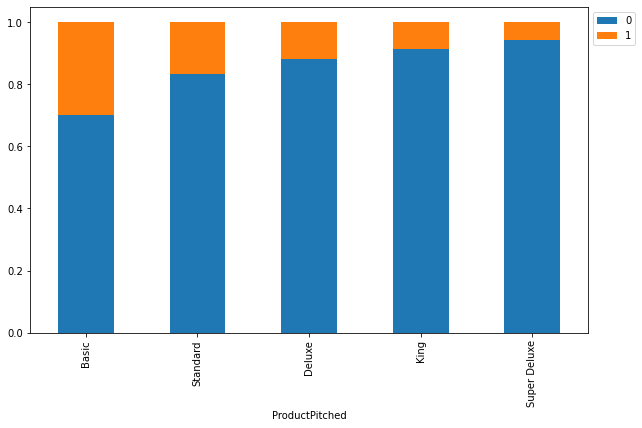

In [ ]:
#Barplot of prodtaken by ProductPitched
stacked_barplot(data, "ProductPitched", "ProdTaken")

Basic and standard travel packages for products pitched had a higher sales rate than the deluxe, king, and super deluxe.

***Preferred Property Star v. ProdTaken***

ProdTaken                 0    1   All
PreferredPropertyStar                 
All                    3968  920  4888
3.0                    2531  488  3019
5.0                     706  250   956
4.0                     731  182   913
------------------------------------------------------------------------------------------------------------------------


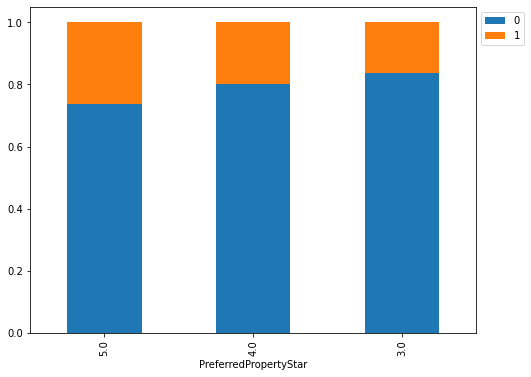

In [ ]:
#Barplot of prodtaken by PreferredPropertyStar
stacked_barplot(data, "PreferredPropertyStar", "ProdTaken")

***Marital Status v. ProdTaken***

ProdTaken         0    1   All
MaritalStatus                 
All            3968  920  4888
Married        2014  326  2340
Single          612  304   916
Unmarried       516  166   682
Divorced        826  124   950
------------------------------------------------------------------------------------------------------------------------


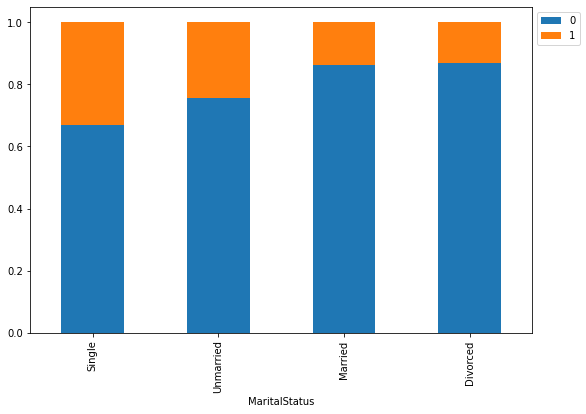

In [ ]:
#Barplot of prodtaken by MaritalStatus
stacked_barplot(data, "MaritalStatus", "ProdTaken")

Single and unmarried people have a higher purchase rate than married and divorced customers.

***Passport v. ProdTaken***

ProdTaken     0    1   All
Passport                  
All        3968  920  4888
1           928  494  1422
0          3040  426  3466
------------------------------------------------------------------------------------------------------------------------


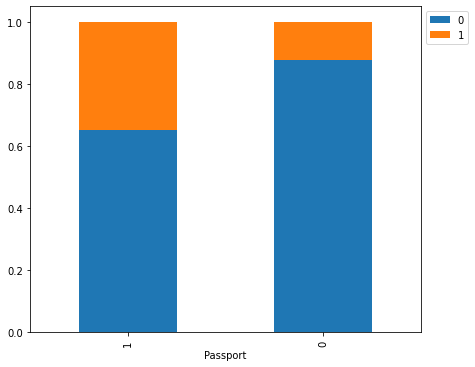

In [ ]:
#Barplot of prodtaken by Passport
stacked_barplot(data, "Passport", "ProdTaken")

Customers with passports purchased more than those without as passport holders are more likely to travel.

***Own Car v. ProdTaken***

ProdTaken     0    1   All
OwnCar                    
All        3968  920  4888
1          2472  560  3032
0          1496  360  1856
------------------------------------------------------------------------------------------------------------------------


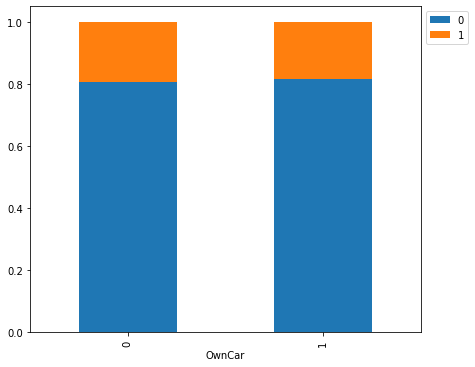

In [ ]:
#Barplot of prodtaken by OwnCar	
stacked_barplot(data, "OwnCar", "ProdTaken")

This is essentially identical. 

***Number Of Children Visiting v. ProdTaken***

ProdTaken                    0    1   All
NumberOfChildrenVisiting                 
All                       3968  920  4888
1.0                       1747  399  2146
2.0                       1082  253  1335
0.0                        880  202  1082
3.0                        259   66   325
------------------------------------------------------------------------------------------------------------------------


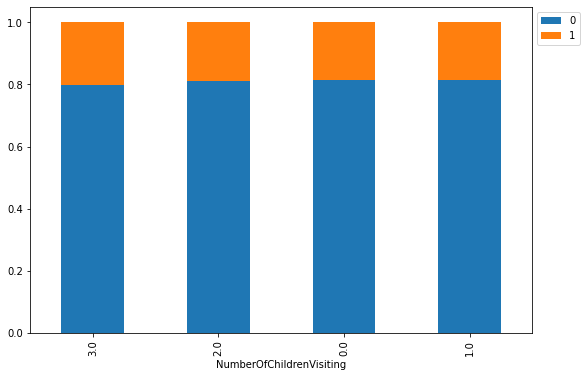

In [ ]:
#Barplot of prodtaken by NumberOfChildrenVisiting	
stacked_barplot(data, "NumberOfChildrenVisiting", "ProdTaken")

This is also essentially identical.

***Designation v. ProdTaken***

ProdTaken          0    1   All
Designation                    
All             3968  920  4888
Executive       1290  552  1842
Manager         1528  204  1732
Senior Manager   618  124   742
AVP              322   20   342
VP               210   20   230
------------------------------------------------------------------------------------------------------------------------


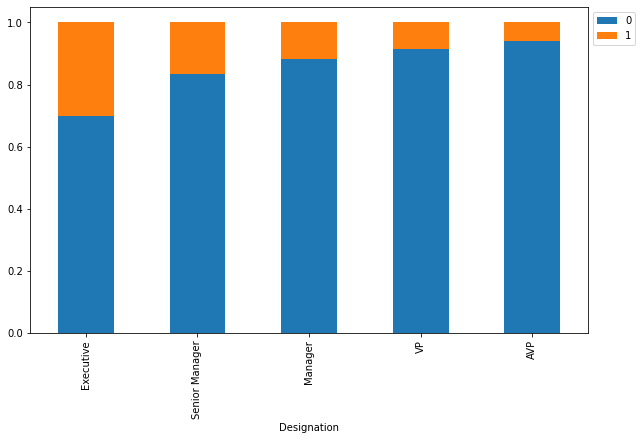

In [ ]:
#Barplot of prodtaken by Designation	
stacked_barplot(data, "Designation", "ProdTaken")

Executives purchased more than any other designation.

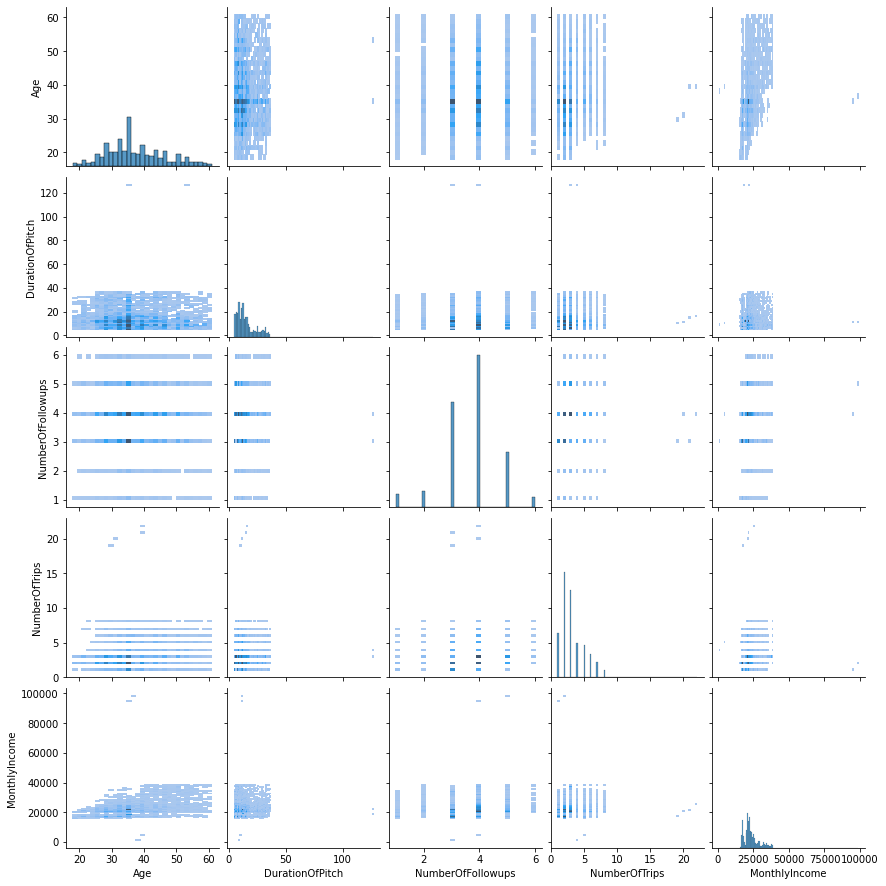

In [ ]:
#Pairplot of all the numeric features
sns.pairplot(data, kind = 'hist');

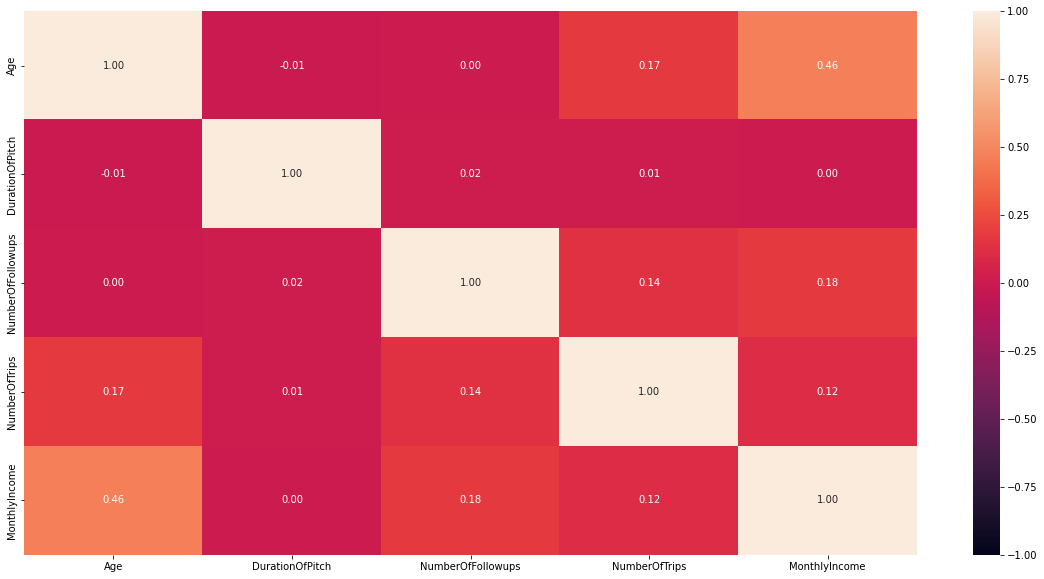

In [ ]:
# heatmap for correlation
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.show()

**Model Building**

In [ ]:
#Function to create confusion matrix for decision tree classifiers
def confusion_matrix_sklearn(model, predictors, target):
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
#Model metrics: Accuracy, Recall, Precision, and F1 scores
def get_metrics_score(model,flag=True):
    # defining an empty list to store train and test results
    score_list=[] 
    #Prediction on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    #Accuracy
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    #Recall
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    #Precision
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    # F1 Scores
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)

    #Add scores to the list
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
    if flag == True: 
        print("Accuracy on training set : ",train_acc)
        print("Accuracy on test set : ",test_acc)
        print("Recall on training set : ",train_recall)
        print("Recall on test set : ",test_recall)
        print("Precision on training set : ",train_precision)
        print("Precision on test set : ",test_precision)
        print("F1 on training set : ",train_f1)
        print("F1 on test set : ",test_f1)
    
    return score_list

**Decision Tree Classifier**

In [ ]:
#Independent and dependent variables
X= data.drop(["ProdTaken"], axis=1)
y= data["ProdTaken"]

In [ ]:
#Convert the categorical columns to dummie values
X = pd.get_dummies(X, drop_first=True)

In [ ]:
# Split data into training and test set
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=25, stratify=y)

In [ ]:
# creating a list of column names
feature_names = X_train.columns.to_list()

In [ ]:
#View split
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3421
Number of rows in test data = 1467


In [ ]:
#Decision Tree Classifer with gini and random state of 1
decision_tree_classifer = DecisionTreeClassifier(criterion="gini", random_state=1)

In [ ]:
#Fitting the model
decision_tree_classifer.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
#Score for Decision Tree Classifer
dt_score = get_metrics_score(decision_tree_classifer)

Accuracy on training set :  1.0
Accuracy on test set :  0.8834355828220859
Recall on training set :  1.0
Recall on test set :  0.7137681159420289
Precision on training set :  1.0
Precision on test set :  0.6816608996539792
F1 on training set :  1.0
F1 on test set :  0.6973451327433628


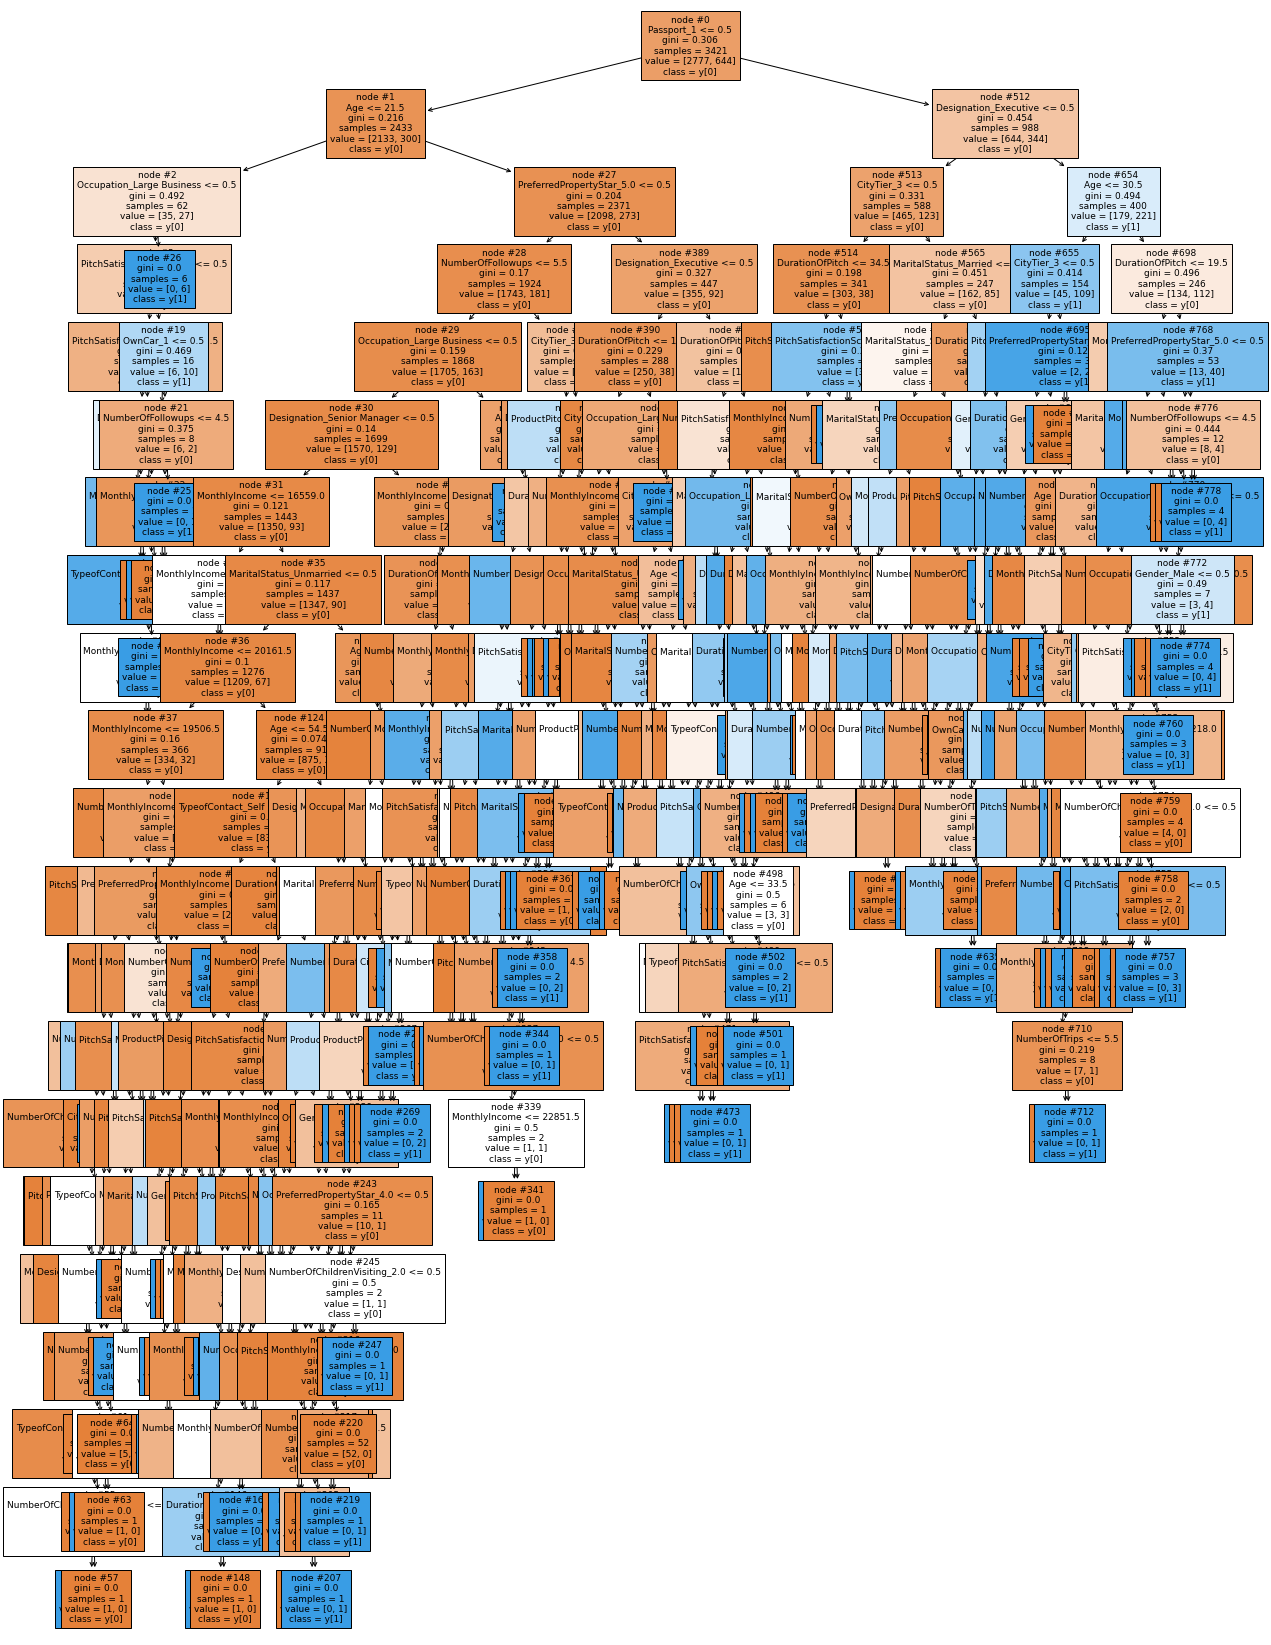

In [ ]:
#Plot decision tree classifier
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    decision_tree_classifer,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
#Text version of gini decision tree
print(tree.export_text(decision_tree_classifer, feature_names=feature_names, show_weights=True))

|--- Passport_1 <= 0.50
|   |--- Age <= 21.50
|   |   |--- Occupation_Large Business <= 0.50
|   |   |   |--- PitchSatisfactionScore_5 <= 0.50
|   |   |   |   |--- PitchSatisfactionScore_4 <= 0.50
|   |   |   |   |   |--- Age <= 20.50
|   |   |   |   |   |   |--- weights: [16.00, 0.00] class: 0
|   |   |   |   |   |--- Age >  20.50
|   |   |   |   |   |   |--- Gender_Male <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 4.00] class: 1
|   |   |   |   |   |   |--- Gender_Male >  0.50
|   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |--- PitchSatisfactionScore_4 >  0.50
|   |   |   |   |   |--- DurationOfPitch <= 8.50
|   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |   |   |   |   |--- DurationOfPitch >  8.50
|   |   |   |   |   |   |--- MonthlyIncome <= 21091.50
|   |   |   |   |   |   |   |--- TypeofContact_Self Enquiry <= 0.50
|   |   |   |   |   |   |   |   |--- MonthlyIncome <= 17617.50
|   |   |   |   |   |   |   |   |   |--- w

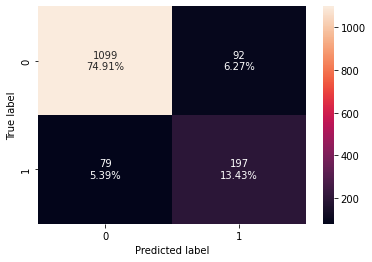

In [ ]:
#Confusion matrix for Decision Tree Classifer
confusion_matrix_sklearn(decision_tree_classifer, X_test, y_test)

**True Negatives (TN):** Correctly predicted that customers did not purchase  a travel package (1,099)

**True Positives (TP):** Correctly predicted that customers purchased a travel package(197)

**False Positives (FP):** Incorrectly predicted that customers purchased a travel package (92 falsely predict positive Type I error)

**False Negatives (FN):** Incorrectly predicted that customers did not purchase  a travel package (79 falsely predict negative Type II error)

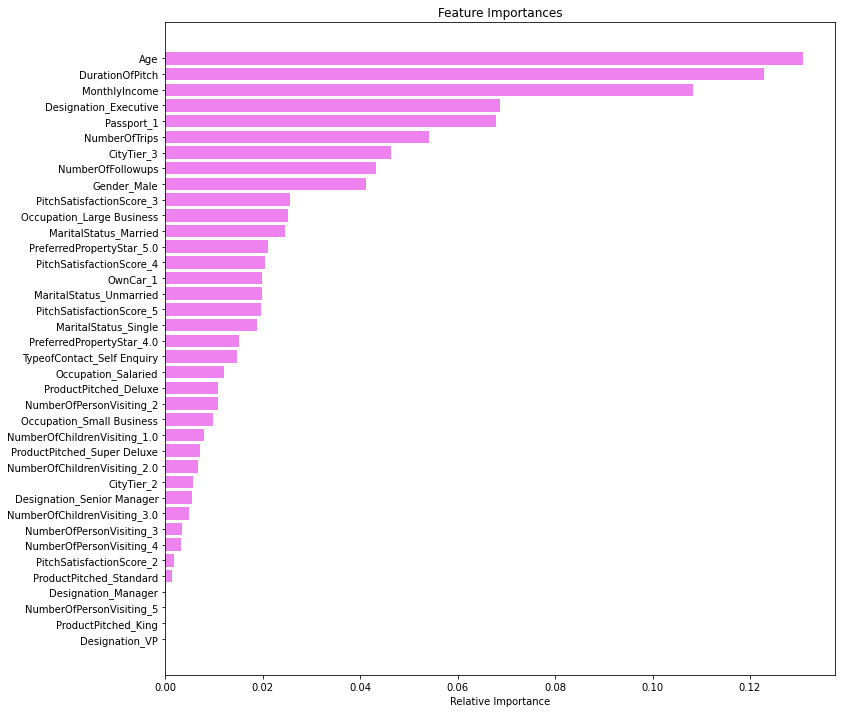

In [ ]:
#Plot importance of gini decision tree
importances = decision_tree_classifer.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**

*   The most important features are age, duration of pitch, and monthly income
*   This model is overfit
*   Accuracy on test data in 88%
*   Recall on test data is 71%
*   Precision score on test data is 68%
*   F1 score on the test data is approximatly 70%



**Hypertuned Decision Tree**

In [ ]:
#Adding the weighted classes
tuned_decision_tree = DecisionTreeClassifier(random_state=1,class_weight = {0:.15,1:.85})

#Tuning hyperparameters
parameters = {"max_depth": np.arange(10,60,10), 
            "criterion": ["gini","entropy"],
            "min_samples_leaf": [ 2, 5, 7, 10],
            "max_leaf_nodes" : [3, 5, 10,15],}

#Scoring
scorer = metrics.make_scorer(metrics.f1_score)

#Run GridSearchCV
grid_obj = GridSearchCV(tuned_decision_tree, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

#Select best
best_decision_tree = grid_obj.best_estimator_

# fit the best algorithm to the data. 
best_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=10, max_leaf_nodes=15, min_samples_leaf=2,
                       random_state=1)

In [ ]:
#Score for hypertuned Decision 
hyper_dt = get_metrics_score(best_decision_tree)

Accuracy on training set :  0.7038877521192634
Accuracy on test set :  0.7021131561008862
Recall on training set :  0.7748447204968945
Recall on test set :  0.7572463768115942
Precision on training set :  0.3650329188002926
Precision on test set :  0.3609671848013817
F1 on training set :  0.4962705121829936
F1 on test set :  0.4888888888888888


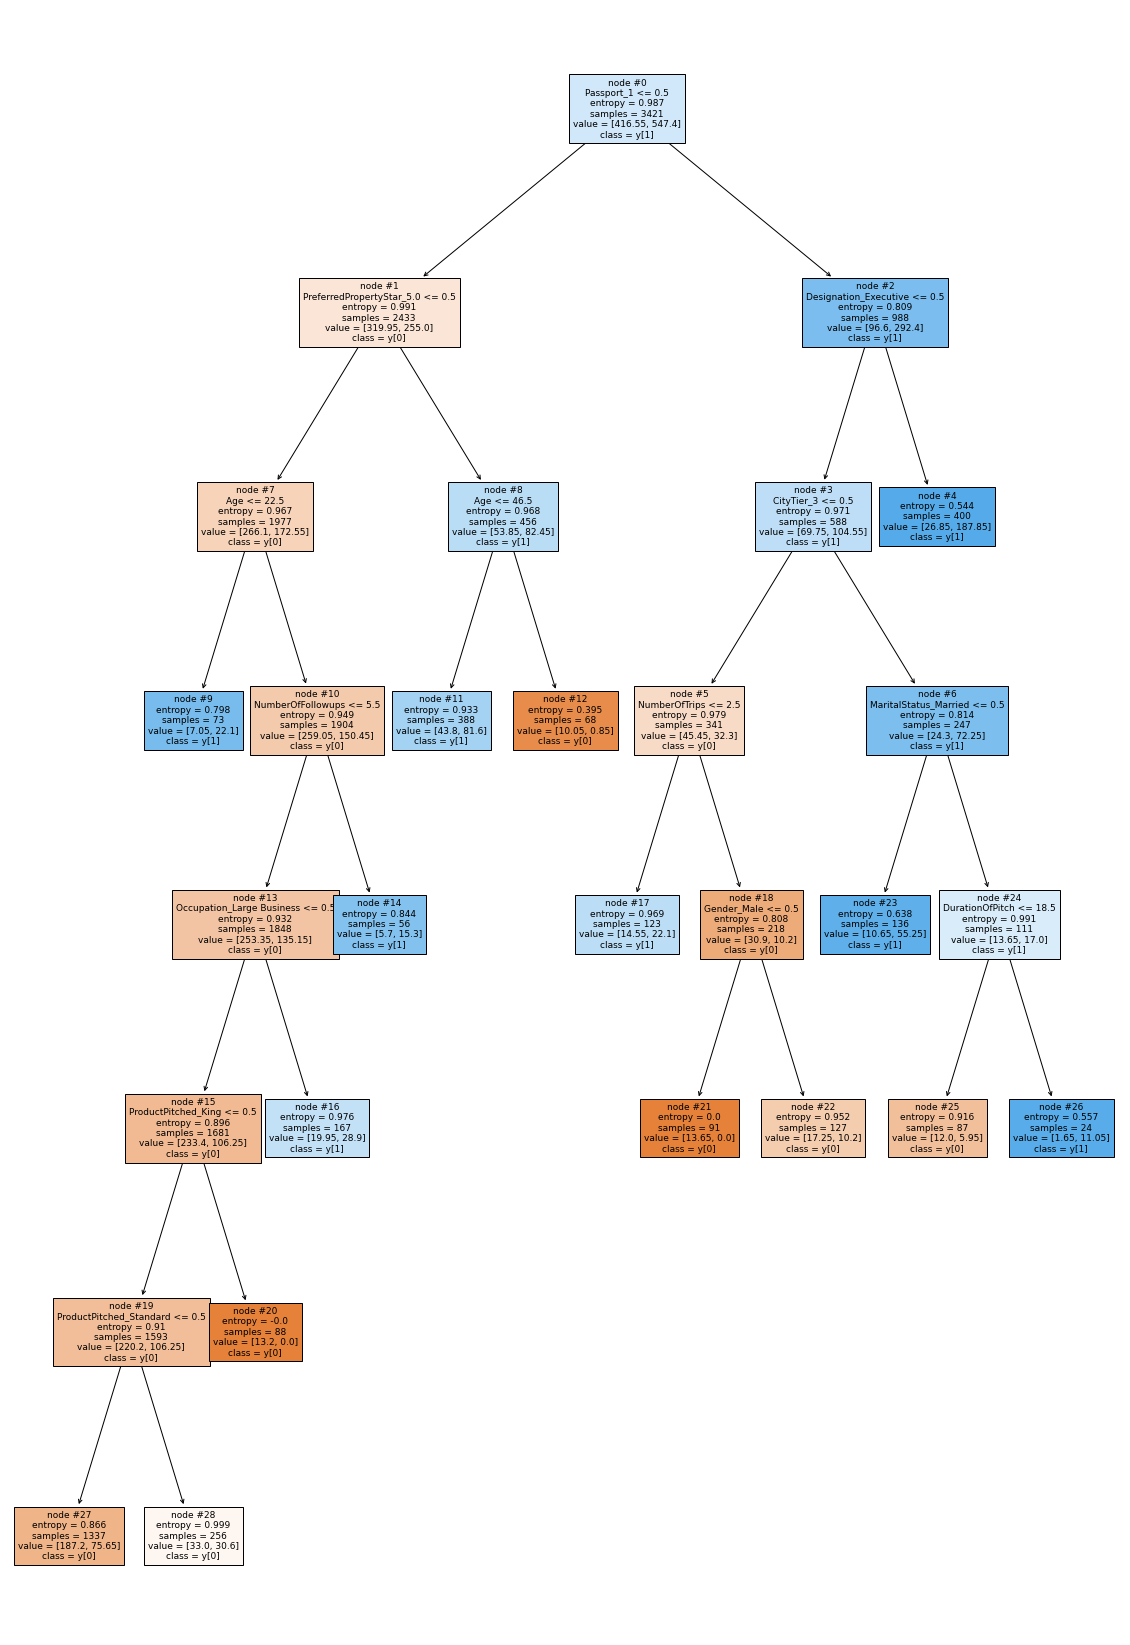

In [ ]:
#Plot hypertuned decision tree classifier
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    best_decision_tree,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
#Text version of gini decision tree
print(tree.export_text(best_decision_tree, feature_names=feature_names, show_weights=True))

|--- Passport_1 <= 0.50
|   |--- PreferredPropertyStar_5.0 <= 0.50
|   |   |--- Age <= 22.50
|   |   |   |--- weights: [7.05, 22.10] class: 1
|   |   |--- Age >  22.50
|   |   |   |--- NumberOfFollowups <= 5.50
|   |   |   |   |--- Occupation_Large Business <= 0.50
|   |   |   |   |   |--- ProductPitched_King <= 0.50
|   |   |   |   |   |   |--- ProductPitched_Standard <= 0.50
|   |   |   |   |   |   |   |--- weights: [187.20, 75.65] class: 0
|   |   |   |   |   |   |--- ProductPitched_Standard >  0.50
|   |   |   |   |   |   |   |--- weights: [33.00, 30.60] class: 0
|   |   |   |   |   |--- ProductPitched_King >  0.50
|   |   |   |   |   |   |--- weights: [13.20, 0.00] class: 0
|   |   |   |   |--- Occupation_Large Business >  0.50
|   |   |   |   |   |--- weights: [19.95, 28.90] class: 1
|   |   |   |--- NumberOfFollowups >  5.50
|   |   |   |   |--- weights: [5.70, 15.30] class: 1
|   |--- PreferredPropertyStar_5.0 >  0.50
|   |   |--- Age <= 46.50
|   |   |   |--- weights: [43.80, 

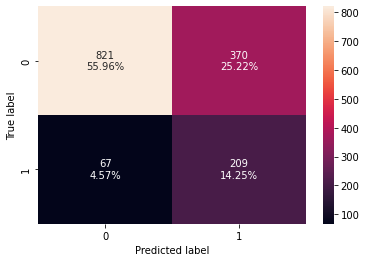

In [ ]:
#Confusion matrix for Decision Tree Classifer
confusion_matrix_sklearn(best_decision_tree, X_test, y_test)

**True Negatives (TN):** Correctly predicted that customers did not purchase  a travel package (821)

**True Positives (TP):** Correctly predicted that customers purchased a travel package (209)

**False Positives (FP):** Incorrectly predicted that customers purchased a travel package (370 falsely predict positive Type I error)

**False Negatives (FN):** Incorrectly predicted that customers did not purchase  a travel package (67 falsely predict negative Type II error)

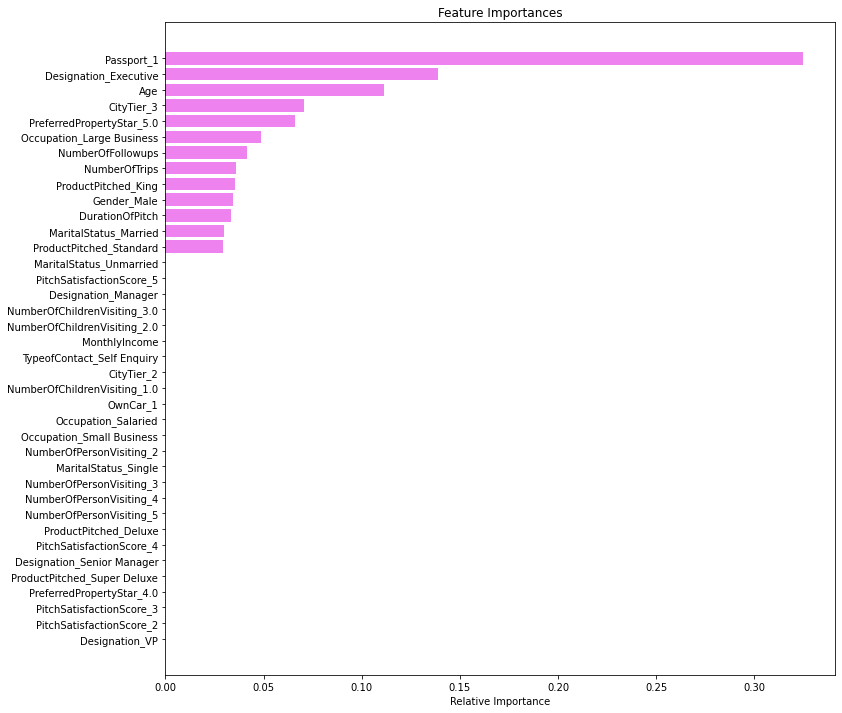

In [ ]:
#Plot importance of hypertuned decision tree
importances = best_decision_tree.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**

*   This tree is much easier to decipher
*   Accuracy on test data decreased to 70%
*   Recall on test data improved to 75%
*   Precision score on test data dropped substantially to 36%
*   F1 score on the test data dropped substantially to 48%

**Bagging Classifier**

In [ ]:
#Bagging Classifier
bagging = BaggingClassifier(random_state=1)

#Fit the model on training dataset
bagging.fit(X_train, y_train)

BaggingClassifier(random_state=1)

In [ ]:
#Bagging scores 
bagging_score = get_metrics_score(bagging)

Accuracy on training set :  0.9926921952645426
Accuracy on test set :  0.9032038173142468
Recall on training set :  0.9642857142857143
Recall on test set :  0.5869565217391305
Precision on training set :  0.9967897271268058
Precision on test set :  0.8526315789473684
F1 on training set :  0.9802683504340964
F1 on test set :  0.6952789699570816


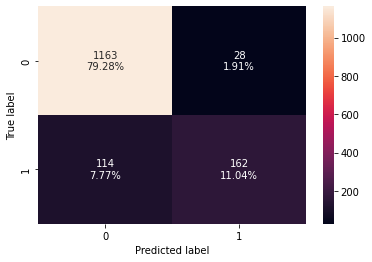

In [ ]:
#Confusion matrix for Decision Tree Classifer
confusion_matrix_sklearn(bagging, X_test, y_test)

**True Negatives (TN):** Correctly predicted that customers did not purchase  a travel package (1,163)

**True Positives (TP):** Correctly predicted that customers purchased a travel package (162)

**False Positives (FP):** Incorrectly predicted that customers purchased a travel package (28 falsely predict positive Type I error)

**False Negatives (FN):** Incorrectly predicted that customers did not purchase  a travel package (114 falsely predict negative Type II error)

**Observations**

*   This model is overfit
*   Accuracy on test data increased to 90%
*   Recall on test data dropped to 58%
*   Precision score on test data increased substantially to 85%
*   F1 score on the test data increased to approximately 70%

**Bagging with Decision Tree Classifier**

In [ ]:
#Bagging with Decision Tree Classifier and weighted classes
bagging_dt = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion="gini",class_weight={0:0.15,1:0.85},random_state=1),random_state=1)

#Fit the model
bagging_dt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.15,
                                                                      1: 0.85},
                                                        random_state=1),
                  random_state=1)

In [ ]:
#Bagging with decision tree classifier scores 
bagging_score = get_metrics_score(bagging_dt)

Accuracy on training set :  0.9903536977491961
Accuracy on test set :  0.8977505112474438
Recall on training set :  0.9518633540372671
Recall on test set :  0.5289855072463768
Precision on training set :  0.9967479674796748
Precision on test set :  0.8795180722891566
F1 on training set :  0.9737887212073074
F1 on test set :  0.6606334841628959


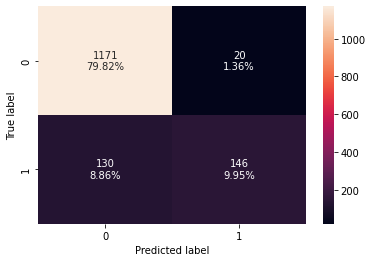

In [ ]:
#Confusion matrix for Bagging with Decision Tree Classifer
confusion_matrix_sklearn(bagging_dt, X_test, y_test)

**True Negatives (TN):** Correctly predicted that customers did not purchase  a travel package (1,171)

**True Positives (TP):** Correctly predicted that customers purchased a travel package (146)

**False Positives (FP):** Incorrectly predicted that customers purchased a travel package (20 falsely predict positive Type I error)

**False Negatives (FN):** Incorrectly predicted that customers did not purchase  a travel package (130 falsely predict negative Type II error)

**Observations**

*   There is no significant difference with this model from the previous

**Bagging with Logistic Regression**

In [ ]:
#BaggingClassifier with logistic refression
bagging_logistic_regression = BaggingClassifier(base_estimator=LogisticRegression(solver="liblinear", random_state=1),random_state=1) 

# fit the model on training set
bagging_logistic_regression.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

In [ ]:
#Bagging with logistic regression scores
bagging_logistic_regression_score = get_metrics_score(bagging_logistic_regression)

Accuracy on training set :  0.8114586378251973
Accuracy on test set :  0.8118609406952966
Recall on training set :  0.0015527950310559005
Recall on test set :  0.0
Precision on training set :  0.3333333333333333
Precision on test set :  0.0
F1 on training set :  0.0030911901081916537
F1 on test set :  0.0


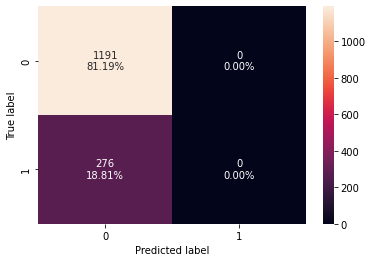

In [ ]:
#Confusion matrix for Bagging with logistic regression
confusion_matrix_sklearn(bagging_logistic_regression, X_test, y_test)

**True Negatives (TN):** Correctly predicted that customers did not purchase  a travel package (1,191)

**True Positives (TP):** Correctly predicted that customers purchased a travel package (0)

**False Positives (FP):** Incorrectly predicted that customers purchased a travel package (0 falsely predict positive Type I error)

**False Negatives (FN):** Incorrectly predicted that customers did not purchase  a travel package (276 falsely predict negative Type II error)

**Observations**

*   This model does not identify any true or false positives

**Hypertuned Bagging Classifier**

In [ ]:
#Setting the parameters
parameters = {
              "n_estimators":np.arange(10,60,10),
              "max_features": [0.7,0.8,0.9],
              "max_samples": [0.7,0.8,0.9], 
             }

#Bagging with Bootstrap
bootstrap_bagging = BaggingClassifier(random_state=1,bootstrap=True)

#Scoring parameters
scorer = metrics.make_scorer(metrics.f1_score)

# run the grid search
grid_obj = GridSearchCV(bootstrap_bagging, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

hypertuned_bagging = grid_obj.best_estimator_

#Fit the model
hypertuned_bagging.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=50,
                  random_state=1)

In [ ]:
#Hypertuned bagging scores
hypertuned_bagging_score = get_metrics_score(hypertuned_bagging)

Accuracy on training set :  0.9994153756211634
Accuracy on test set :  0.9229720518064076
Recall on training set :  0.9968944099378882
Recall on test set :  0.6630434782608695
Precision on training set :  1.0
Precision on test set :  0.9014778325123153
F1 on training set :  0.9984447900466563
F1 on test set :  0.7640918580375783


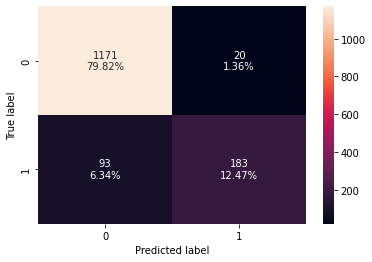

In [ ]:
#Confusion matrix for Bagging with Decision Tree Classifer
confusion_matrix_sklearn(hypertuned_bagging, X_test, y_test)

**True Negatives (TN):** Correctly predicted that customers did not purchase  a travel package (1,171)

**True Positives (TP):** Correctly predicted that customers purchased a travel package (183)

**False Positives (FP):** Incorrectly predicted that customers purchased a travel package (20 falsely predict positive Type I error)

**False Negatives (FN):** Incorrectly predicted that customers did not purchase  a travel package (93 falsely predict negative Type II error)

**Observations**

*   Lowered the false positives identified
*   This model is overfit
*   Accuracy on test data increased to 92%
*   Recall on test data is 66%
*   Precision score on test data is 90%
*   F1 score on the test data is 76%

**Random Forest Classifier**

In [ ]:
#Random Forest Classifier
random_forest = RandomForestClassifier(random_state=1)

#Fit the model
random_forest.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [ ]:
#Random forest scores
random_forest_score = get_metrics_score(random_forest)

Accuracy on training set :  1.0
Accuracy on test set :  0.9079754601226994
Recall on training set :  1.0
Recall on test set :  0.5471014492753623
Precision on training set :  1.0
Precision on test set :  0.937888198757764
F1 on training set :  1.0
F1 on test set :  0.6910755148741419


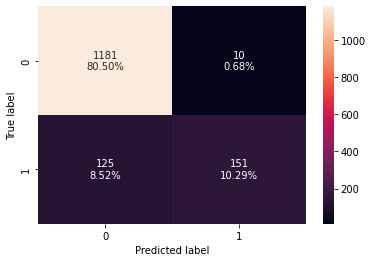

In [ ]:
#Confusion matrix for random forest
confusion_matrix_sklearn(random_forest, X_test, y_test)

**True Negatives (TN):** Correctly predicted that customers did not purchase  a travel package (1,181)

**True Positives (TP):** Correctly predicted that customers purchased a travel package (151)

**False Positives (FP):** Incorrectly predicted that customers purchased a travel package (10 falsely predict positive Type I error)

**False Negatives (FN):** Incorrectly predicted that customers did not purchase  a travel package (125 falsely predict negative Type II error)

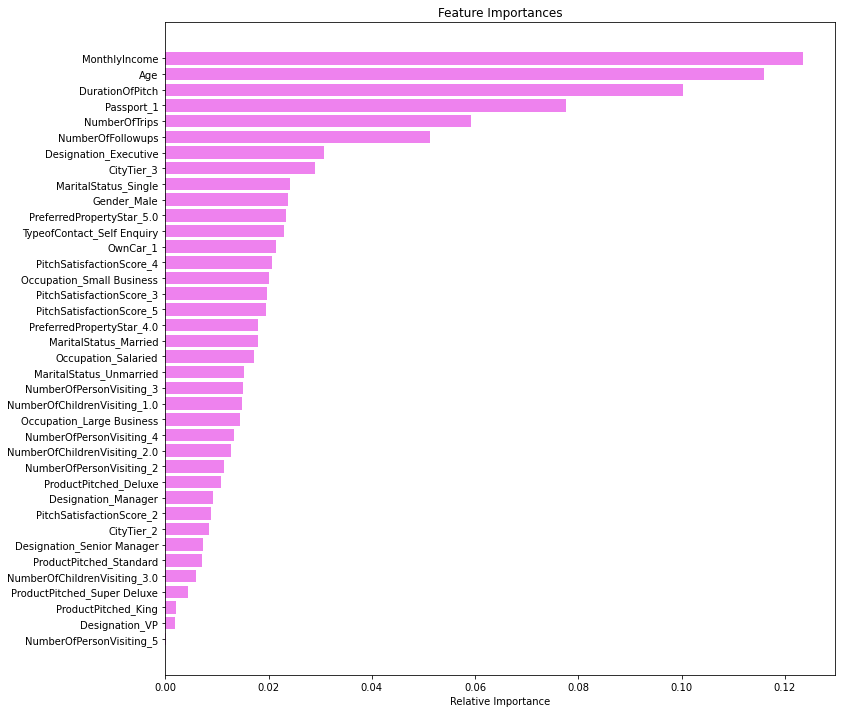

In [ ]:
#Plot importance of hypertuned decision tree
importances = random_forest.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**

*   The most important features are monthly income, age, and duration of pitch
*   This model is overfit
*   Accuracy on test data is 90%
*   Recall on test data is 55%
*   Precision score on test data is 94%
*   F1 score on the test data decreased to 61%

**Random Forest with Class Weights**

In [ ]:
#Random forest classifier with class weights
weighted_random_forest = RandomForestClassifier(class_weight={0:0.15,1:0.85},random_state=1)

#Fit the model
weighted_random_forest.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

In [ ]:
#Random forest with class weights scores
weighted_random_forest_score = get_metrics_score(weighted_random_forest)

Accuracy on training set :  1.0
Accuracy on test set :  0.8929788684389911
Recall on training set :  1.0
Recall on test set :  0.4673913043478261
Precision on training set :  1.0
Precision on test set :  0.9280575539568345
F1 on training set :  1.0
F1 on test set :  0.6216867469879518


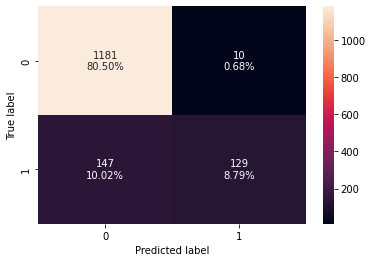

In [ ]:
#Confusion matrix for weighted random forest
confusion_matrix_sklearn(weighted_random_forest, X_test, y_test)

**True Negatives (TN):** Correctly predicted that customers did not purchase  a travel package (1,181)

**True Positives (TP):** Correctly predicted that customers purchased a travel package (129)

**False Positives (FP):** Incorrectly predicted that customers purchased a travel package (10 falsely predict positive Type I error)

**False Negatives (FN):** Incorrectly predicted that customers did not purchase  a travel package (147 falsely predict negative Type II error)

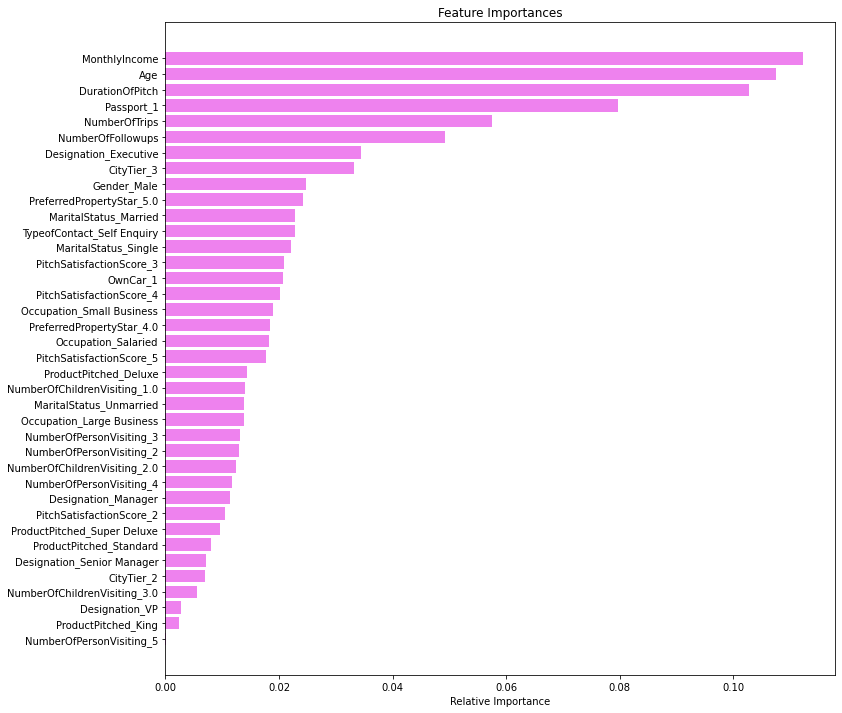

In [ ]:
#Plot importance of weighted random forest
importances = weighted_random_forest.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**

*   This model is overfitting
*   The most important features are monthly income, age, and duration of pitch
*   The accuracy for the test data is 89%
*   The recall score for the test data is approximately 47%
*   The precision for the test data is approximately 93%
*   The F1 score on the test data is 62%




**Hypertuned Random Forest**

In [ ]:
# Weighted random forest
hypertuned_weighted_rf = RandomForestClassifier(class_weight={0:0.15,1:0.85},random_state=1)

#Define parameters
parameters = {"n_estimators": np.arange(110,251,501),
              "min_samples_leaf": np.arange(1,6,1),
              "max_features":["log2",0.7,0.9,"auto"],
              "max_samples": np.arange(0.3, 0.7, None),
             }

#Scoring parameter
scorer = metrics.make_scorer(metrics.f1_score)

#Run GridSearchCV
grid_obj = GridSearchCV(hypertuned_weighted_rf, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

hypertuned_rf = grid_obj.best_estimator_

#Fit the model
hypertuned_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.15, 1: 0.85}, max_features=0.7,
                       max_samples=0.3, min_samples_leaf=5, n_estimators=110,
                       random_state=1)

In [ ]:
#Hypertuned Random forest scores
ht_random_forest_score = get_metrics_score(hypertuned_rf)

Accuracy on training set :  0.895352236188249
Accuracy on test set :  0.8623040218132243
Recall on training set :  0.7515527950310559
Recall on test set :  0.5942028985507246
Precision on training set :  0.7096774193548387
Precision on test set :  0.6456692913385826
F1 on training set :  0.7300150829562594
F1 on test set :  0.6188679245283019


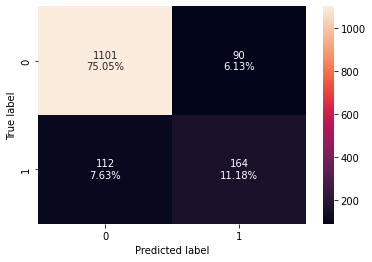

In [ ]:
#Confusion matrix for hypertuned weighted random forest
confusion_matrix_sklearn(hypertuned_rf, X_test, y_test)

**True Negatives (TN):** Correctly predicted that customers did not purchase  a travel package (1,101)

**True Positives (TP):** Correctly predicted that customers purchased a travel package (164)

**False Positives (FP):** Incorrectly predicted that customers purchased a travel package (90 falsely predict positive Type I error)

**False Negatives (FN):** Incorrectly predicted that customers did not purchase  a travel package (112 falsely predict negative Type II error)

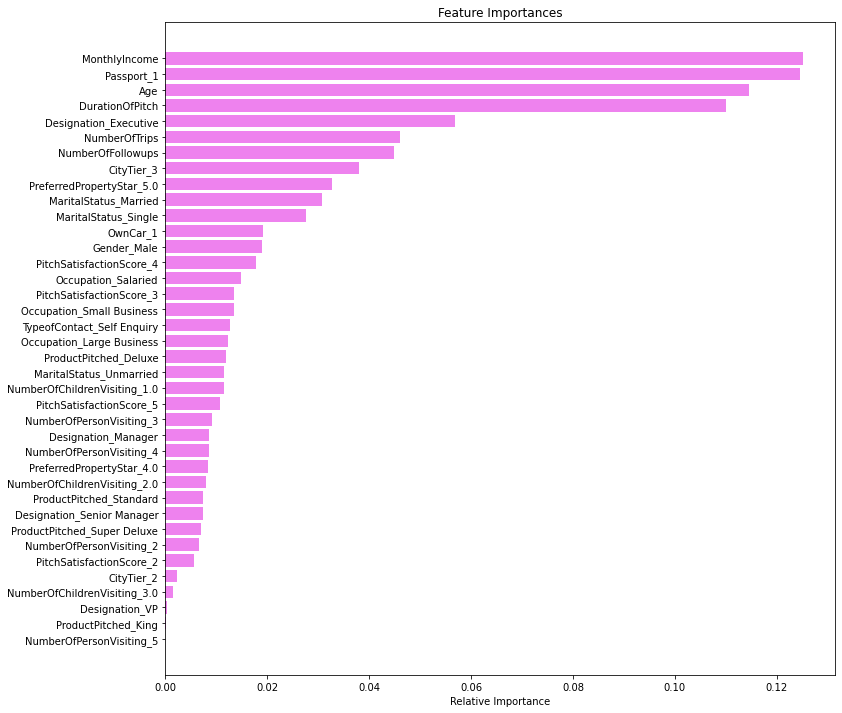

In [ ]:
#Plot importance of hypertuned random forest
importances = hypertuned_rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Obseravtions**

*   The most important features are monthly income, customers with passports, and age
*   This model does not appear to be overfit as compared to many of the previous models
*   The accuracy on the test data is 86%
*   The recall on the test data is 59%
*   The precision on the test data is 65%
*   The F1 score on the test data is 62%




**AdaBoosting**

In [ ]:
#Adaboost classifier
ada_boost = AdaBoostClassifier(random_state=1)

#Fit the model
ada_boost.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [ ]:
#Scores on Adaboost
ada_score = get_metrics_score(ada_boost)

Accuracy on training set :  0.8515054077755042
Accuracy on test set :  0.8513974096796183
Recall on training set :  0.33695652173913043
Recall on test set :  0.3442028985507246
Precision on training set :  0.7281879194630873
Precision on test set :  0.7196969696969697
F1 on training set :  0.4607218683651805
F1 on test set :  0.4656862745098039


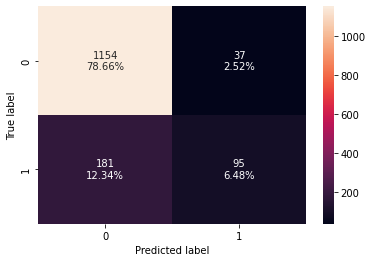

In [ ]:
#Confusion matrix for Adaboost
confusion_matrix_sklearn(ada_boost, X_test, y_test)

**True Negatives (TN):** Correctly predicted that customers did not purchase  a travel package (1,154)

**True Positives (TP):** Correctly predicted that customers purchased a travel package (95)

**False Positives (FP):** Incorrectly predicted that customers purchased a travel package (37 falsely predict positive Type I error)

**False Negatives (FN):** Incorrectly predicted that customers did not purchase  a travel package (181 falsely predict negative Type II error)

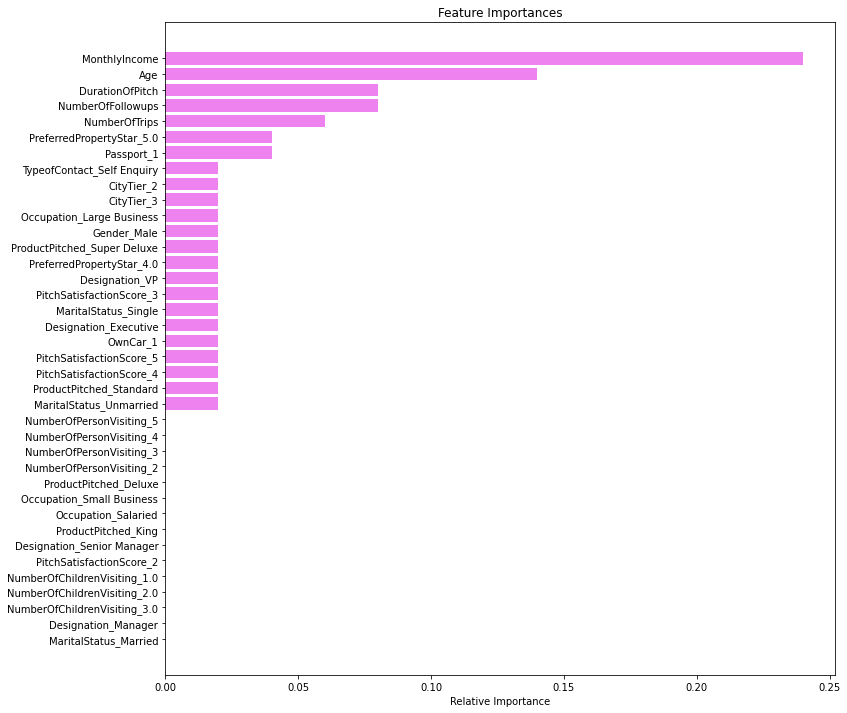

In [ ]:
#Plot importance of AdaBoost
importances = ada_boost.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**

*   The most important features are monthly income, duration of pitch, and age
*   This model is also not overfit
*   The accuracy on the test data is 85%
*   The recall on the test data is 34%
*   The precision on the test data is 72%
*   The F1 score on the test data is 47%



**Hypertuned AdaBoost**

In [ ]:
#Hypertuned AdaBoost 
hypertuned_ada = AdaBoostClassifier(random_state=1)

#Parameters
parameters = {
    "base_estimator":[DecisionTreeClassifier(max_depth=1,random_state=1),DecisionTreeClassifier(max_depth=2,random_state=1),
                      DecisionTreeClassifier(max_depth=3,random_state=1)],
    "n_estimators": np.arange(10,60,10),
    "learning_rate": [0.05,0.15,0.45,0.75]
}

#Scoring parameters
scorer = metrics.make_scorer(metrics.f1_score)

#Run GridSearchCV
grid_obj = GridSearchCV(hypertuned_ada, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

hyper_adaboost = grid_obj.best_estimator_

#Fit the model
hyper_adaboost.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.75, random_state=1)

In [ ]:
#Scores on hypetuned Adaboost
hypertuned_ada_score = get_metrics_score(hyper_adaboost)

Accuracy on training set :  0.9351066939491377
Accuracy on test set :  0.880027266530334
Recall on training set :  0.7127329192546584
Recall on test set :  0.5181159420289855
Precision on training set :  0.9254032258064516
Precision on test set :  0.7688172043010753
F1 on training set :  0.8052631578947368
F1 on test set :  0.619047619047619


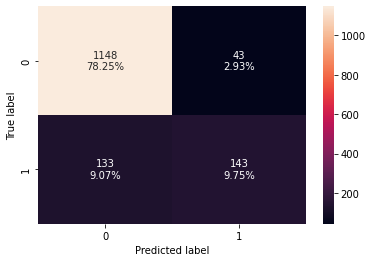

In [ ]:
#Confusion matrix for hypertuned Adaboost
confusion_matrix_sklearn(hyper_adaboost, X_test, y_test)

**True Negatives (TN):** Correctly predicted that customers did not purchase  a travel package (1,148)

**True Positives (TP):** Correctly predicted that customers purchased a travel package (143)

**False Positives (FP):** Incorrectly predicted that customers purchased a travel package (43 falsely predict positive Type I error)

**False Negatives (FN):** Incorrectly predicted that customers did not purchase a travel package (133 falsely predict negative Type II error)

**Observations**

*   The accuracy score on the test data is 88% (3 points higher than AdaBoost)
*   The recall score on the test data is 52% (a major improvement as compared to the AdaBoost)
*   The precision score on the test data is 77% ( a 5 point increase)
*   The F1 score on the test data is 62% (substantially higher than AdaBoost)



**Gradient Boost Classifier**

In [ ]:
#Gradient boost classifier
gradient_boost = GradientBoostingClassifier(random_state=1)

#Fit the model
gradient_boost.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

In [ ]:
#Scores on Gradient Boost
gb_score = get_metrics_score(gradient_boost)

Accuracy on training set :  0.8944752996199942
Accuracy on test set :  0.8657123381049762
Recall on training set :  0.5015527950310559
Recall on test set :  0.3804347826086957
Precision on training set :  0.8898071625344353
Precision on test set :  0.8015267175572519
F1 on training set :  0.6415094339622641
F1 on test set :  0.515970515970516


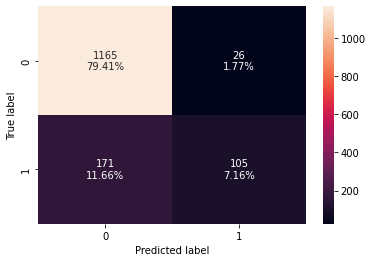

In [ ]:
#Confusion matrix for gradient boosting
confusion_matrix_sklearn(gradient_boost, X_test, y_test)

**True Negatives (TN):** Correctly predicted that customers did not purchase  a travel package (1,165)

**True Positives (TP):** Correctly predicted that customers purchased a travel package (105)

**False Positives (FP):** Incorrectly predicted that customers purchased a travel package (26 falsely predict positive Type I error)

**False Negatives (FN):** Incorrectly predicted that customers did not purchase  a travel package (171 falsely predict negative Type II error)

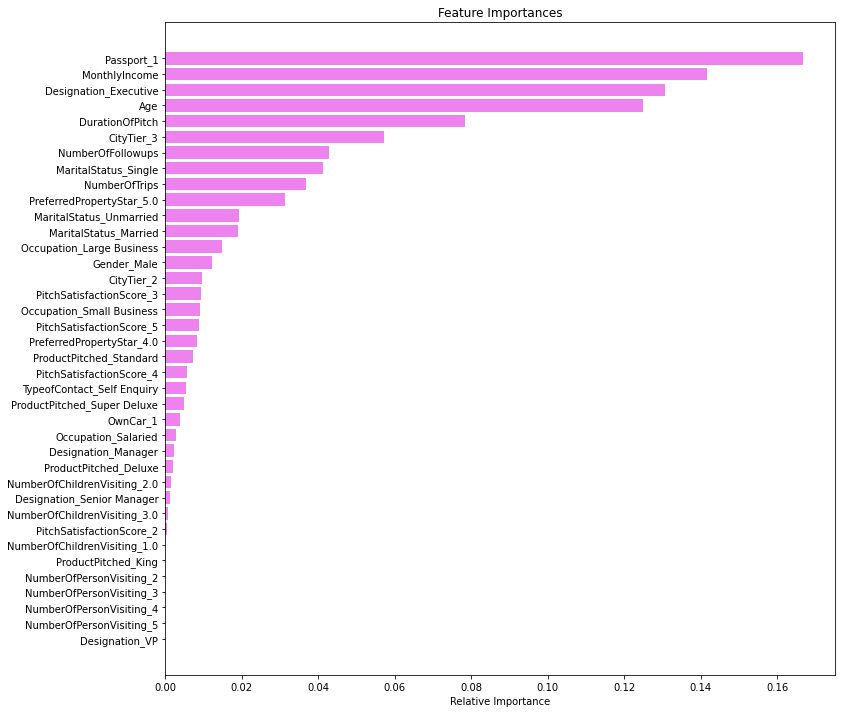

In [ ]:
#Plot importance of Gradient Boost
importances = gradient_boost.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**

*   The most imprtant feature are passport holders, monthly income, and executive designation
*   The accuracy score on the test data is 87% 
*   The recall score on the test data is 38%
*   The precision score on the test data is 80%
*   The F1 score on the test data is 52%



**Gradient Boost using AdaBoosting Classifier**

In [ ]:
#Gradient boost with Ada Classifier
gradient_with_ada = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

#Fit the model
gradient_with_ada.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

In [ ]:
#Scores on Gradient Boost
gb_ada_score = get_metrics_score(gradient_with_ada)

Accuracy on training set :  0.892429114294066
Accuracy on test set :  0.8588957055214724
Recall on training set :  0.4860248447204969
Recall on test set :  0.3442028985507246
Precision on training set :  0.8942857142857142
Precision on test set :  0.7851239669421488
F1 on training set :  0.6297786720321931
F1 on test set :  0.4785894206549119


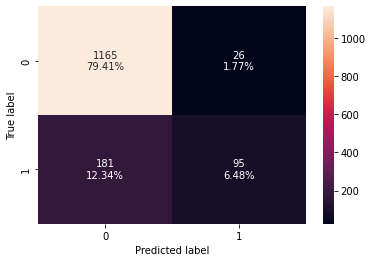

In [ ]:
#Confusion matrix for gradient boosting with Ada Classifier
confusion_matrix_sklearn(gradient_with_ada, X_test, y_test)

**True Negatives (TN):** Correctly predicted that customers did not purchase  a travel package (1,165)

**True Positives (TP):** Correctly predicted that customers purchased a travel package (95)

**False Positives (FP):** Incorrectly predicted that customers purchased a travel package (26 falsely predict positive Type I error)

**False Negatives (FN):** Incorrectly predicted that customers did not purchase  a travel package (181 falsely predict negative Type II error)

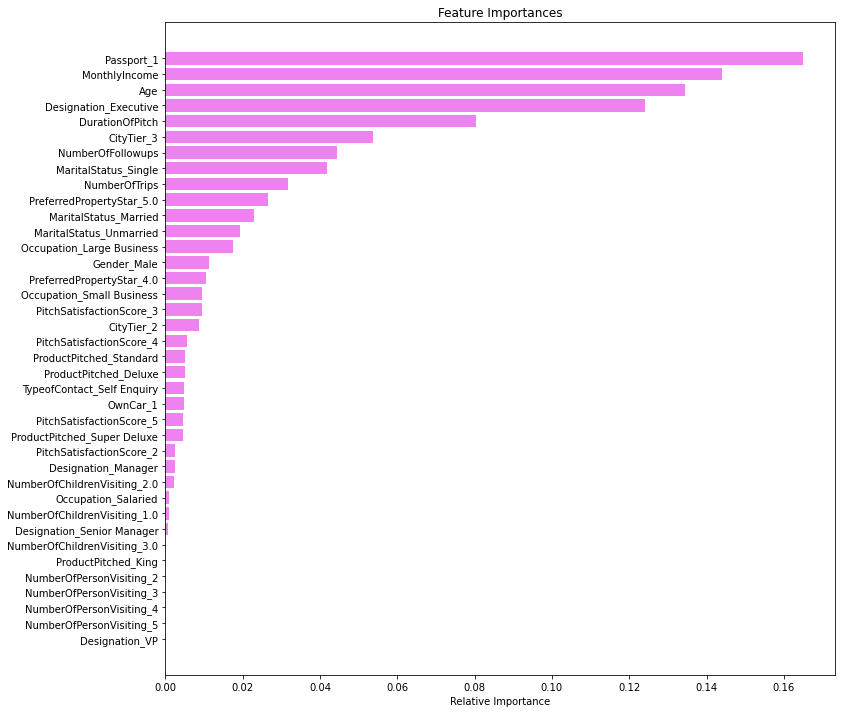

In [ ]:
#Plot importance of Gradient Boost with ada
importances = gradient_with_ada.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Obseravtions**

*   This model is not overfit
*   The most imprtant feature are passport holders, monthly income, and age
*   The accuracy score on the test data is 86% 
*   The recall score on the test data is 49%
*   The precision score on the test data is 79%
*   The F1 score on the test data is 48%



**Hypertuned Gradient Boost Classifier**

In [ ]:
#Hypertuned Gradient Boosting 
hypertuned_gb = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

#Parameters
parameters = {
    "n_estimators": np.arange(10,60,5),
    "subsample":[0.6,0.7,0.8],
    "max_features":[0.6,0.7,0.8],
    "learning_rate": [0.05,0.15,0.5]
}

#Scoring the parameters
scorer = metrics.make_scorer(metrics.f1_score)

#Run GridSearchCV
grid_obj = GridSearchCV(hypertuned_gb, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

tuned_gb = grid_obj.best_estimator_

#Fit the model
tuned_gb.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.5, max_features=0.8, n_estimators=55,
                           random_state=1, subsample=0.8)

In [ ]:
#Scores on hypertuned Gradient Boost
hypertuned_gb_score = get_metrics_score(tuned_gb)

Accuracy on training set :  0.9313066354866998
Accuracy on test set :  0.8773006134969326
Recall on training set :  0.6956521739130435
Recall on test set :  0.48188405797101447
Precision on training set :  0.919917864476386
Precision on test set :  0.7823529411764706
F1 on training set :  0.7922192749778957
F1 on test set :  0.5964125560538116


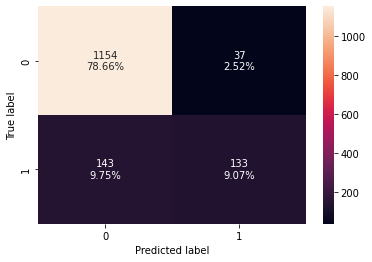

In [ ]:
#Confusion matrix for hypertuned gradient boosting
confusion_matrix_sklearn(tuned_gb, X_test, y_test)

**True Negatives (TN):** Correctly predicted that customers did not purchase  a travel package (1,154)

**True Positives (TP):** Correctly predicted that customers purchased a travel package (133)

**False Positives (FP):** Incorrectly predicted that customers purchased a travel package (37 falsely predict positive Type I error)

**False Negatives (FN):** Incorrectly predicted that customers did not purchase  a travel package (143 falsely predict negative Type II error)

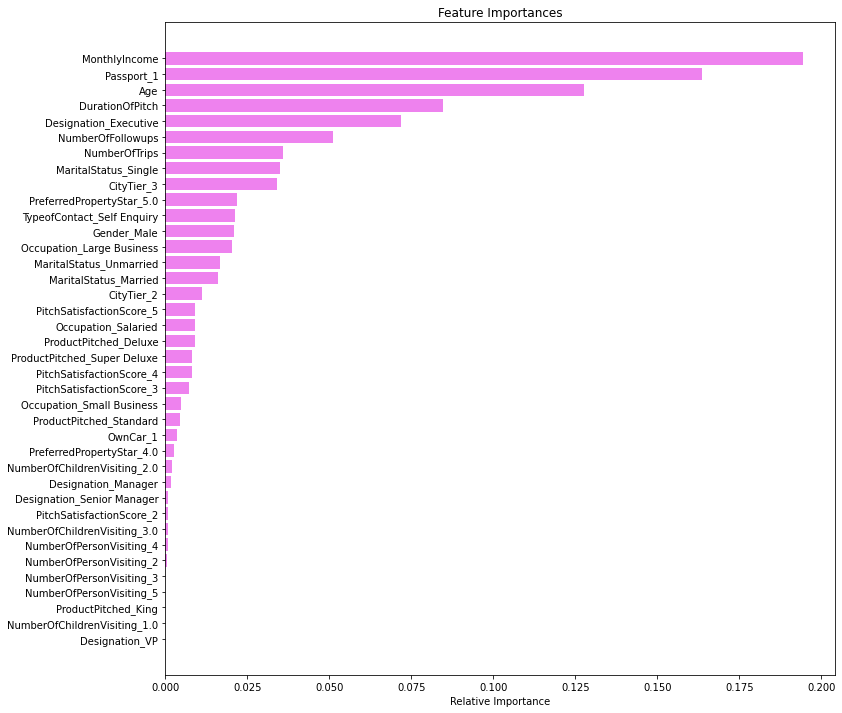

In [ ]:
#Plot importance of hypertuned Gradient Boost with ada
importances = tuned_gb.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Obseravtions**

*   This model is not overfit
*   The most imprtant feature are monthly income, passport holders,, and age
*   The accuracy score on the test data is 88% 
*   The recall score on the test data is 48%
*   The precision score on the test data is 78%
*   The F1 score on the test data is 60%

**XGBoost**

In [ ]:
#XGBoost Classifer with logloss
xg_boost = XGBClassifier(random_state=1, eval_metric="logloss")

#Fit the model
xg_boost.fit(X_train,y_train)

XGBClassifier(eval_metric='logloss', random_state=1)

In [ ]:
#Scores on XGBoost Gradient Boost
xgb_score = get_metrics_score(xg_boost)

Accuracy on training set :  0.8851213095586086
Accuracy on test set :  0.8616223585548739
Recall on training set :  0.44875776397515527
Recall on test set :  0.35507246376811596
Precision on training set :  0.8837920489296636
Precision on test set :  0.7967479674796748
F1 on training set :  0.5952626158599382
F1 on test set :  0.4912280701754387


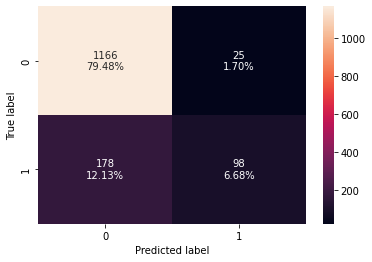

In [ ]:
#Confusion matrix for hypertuned gradient boosting
confusion_matrix_sklearn(xg_boost, X_test, y_test)

**True Negatives (TN):** Correctly predicted that customers did not purchase  a travel package (1,166)

**True Positives (TP):** Correctly predicted that customers purchased a travel package (98)

**False Positives (FP):** Incorrectly predicted that customers purchased a travel package (25 falsely predict positive Type I error)

**False Negatives (FN):** Incorrectly predicted that customers did not purchase  a travel package (178 falsely predict negative Type II error)

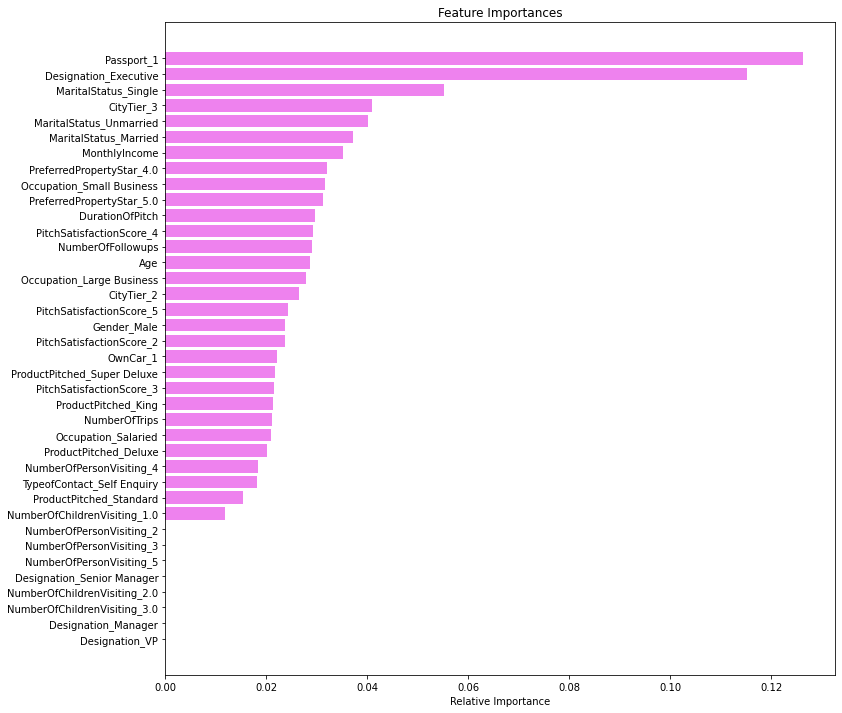

In [ ]:
#Plot importance of hypertuned Gradient Boost with ada
importances = xg_boost.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observations**

*   This model is not overfit
*   The most important feature are passport holders, executive designation, and single for marital status
*   The accuracy score on the test data is 86% 
*   The recall score on the test data is 45%
*   The precision score on the test data is 80%
*   The F1 score on the test data is 49%

**Stacking Classifier**

In [ ]:
#Defining the estimators
estimators = [("Random Forest", random_forest),("ADA Boosting", ada_boost),("Decision Tree", decision_tree_classifer)]

#Defining the final estimator
final_estimator = xg_boost

#Selecting the classifier
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator = final_estimator)

#Fit the model
stacking_classifier.fit(X_train,y_train) 

StackingClassifier(estimators=[('Random Forest',
                                RandomForestClassifier(random_state=1)),
                               ('ADA Boosting',
                                AdaBoostClassifier(random_state=1)),
                               ('Decision Tree',
                                DecisionTreeClassifier(random_state=1))],
                   final_estimator=XGBClassifier(eval_metric='logloss',
                                                 random_state=1))

In [ ]:
#Scores on XGBoost Gradient Boost
stacked_score = get_metrics_score(stacking_classifier)

Accuracy on training set :  1.0
Accuracy on test set :  0.9379686434901159
Recall on training set :  1.0
Recall on test set :  0.7536231884057971
Precision on training set :  1.0
Precision on test set :  0.9004329004329005
F1 on training set :  1.0
F1 on test set :  0.8205128205128206


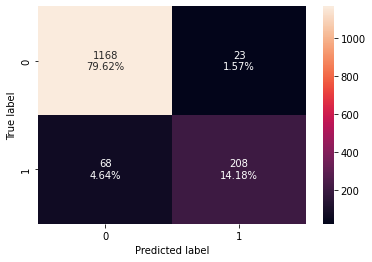

In [ ]:
#Confusion matrix for stacking
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

**True Negatives (TN):** Correctly predicted that customers did not purchase  a travel package (1,168)

**True Positives (TP):** Correctly predicted that customers purchased a travel package (208)

**False Positives (FP):** Incorrectly predicted that customers purchased a travel package (23 falsely predict positive Type I error)

**False Negatives (FN):** Incorrectly predicted that customers did not purchase  a travel package (68 falsely predict negative Type II error)

**Observations**

*   The accuracy score on the test data is 94% 
*   The recall score on the test data is 75%
*   The precision score on the test data is 90%
*   The F1 score on the test data is 82%



**Comparing All Models**

In [ ]:
# defining list of models
models = [decision_tree_classifer, best_decision_tree, bagging, bagging_dt, bagging_logistic_regression, hypertuned_bagging, random_forest, 
          weighted_random_forest, hypertuned_rf, ada_boost, hyper_adaboost, gradient_boost, gradient_with_ada, tuned_gb, xg_boost, stacking_classifier]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the accuracy, f1, recall and precision scores
for model in models:
    j = get_metrics_score(model, False)
    acc_train.append(np.round(j[0],2))
    acc_test.append(np.round(j[1],2))
    recall_train.append(np.round(j[2],2))
    recall_test.append(np.round(j[3],2))
    precision_train.append(np.round(j[4],2))
    precision_test.append(np.round(j[5],2))
    f1_train.append(np.round(j[6],2))
    f1_test.append(np.round(j[7],2))

In [ ]:
# create dataframe
comparison_frame = pd.DataFrame({"Model (Test Data)":["Decision Tree", 'Tuned Decision Tree', 'Bagging', 'Bagging with Decision Tree', 'Bagging with Logistic Regression',
                                                      'Hypertuned Bagging', 'Random Forest', 'Random Forest with Class Weights', 
                                                      'Hypertuned Random Forest','AdaBoost', 'Hypertuned AdaBoost', 'Gradient Boost', 'Gradient Boost using AdaBoosting',
                                                      "Hypertuned Gradient Boost", 'XGBoost', 'Stacking'],
                                          "Accuracy" : acc_test, "Recall": recall_test, "Precision" :precision_test,"F1": f1_test}) 
comparison_frame

,Model (Test Data),Accuracy,Recall,Precision,F1
0,Decision Tree,0.88,0.71,0.68,0.70
1,Tuned Decision Tree,0.70,0.76,0.36,0.49
2,Bagging,0.90,0.59,0.85,0.70
3,Bagging with Decision Tree,0.90,0.53,0.88,0.66
4,Bagging with Logistic Regression,0.81,0.00,0.00,0.00
5,Hypertuned Bagging,0.92,0.66,0.90,0.76
6,Random Forest,0.91,0.55,0.94,0.69
7,Random Forest with Class Weights,0.89,0.47,0.93,0.62
8,Hypertuned Random Forest,0.86,0.59,0.65,0.62
9,AdaBoost,0.85,0.34,0.72,0.47


**Conclusion**

*   The data showed that single people are more likely to purchase the travel package
*   The ideal age with the greatest potential for purchase were younger people, 18-24 being a good demographic
*   Customers who have higher incomes are not only older, but when purchasing, they tend to buy higher end packages
*   The dataset was no sufficiently balanced. Most people in this dataset did not purchase any package.
*   The stacking alogorithm had the highest accuracy and F1 score, but the random forest had the highest precision and the tuned decision tree model had the best recall score
*   Additionally, the stacking algorithm had the best true positive rate



**Recommendations**

*   The wellness package should be targeted to single customers without kids as this would not necessarily be a family type vacation package
*   Executives tend to have much higher stress, more demanding jobs. A wellness travel package could just be the recharge trip needed. The marketing team should look to create a campaign to highlight the package to recharge from potential burnout.
*   Incentive the purchase by offering previous purchasers a discounted rate to increase the buzz around the new offering
* Since many purchasers already are passport holders, expand the wellness package to international destinations

